In [ ]:
! pip install scanpy leidenalg python-igraph louvain

- scatter plots for embeddings (e.g. UMAP, t-SNE)

- Identifcation of clusters using known marker genes

- Visualization of DE genes

data: 10x containing 68k cells from PBMC -> reduced to 700 cells and 765 highly variable genes

In [6]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context

In [7]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.19.5 scipy==1.4.1 pandas==1.1.5 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.9.6 louvain==0.7.0 pynndescent==0.5.4


In [8]:
pbmc = sc.datasets.pbmc68k_reduced()
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

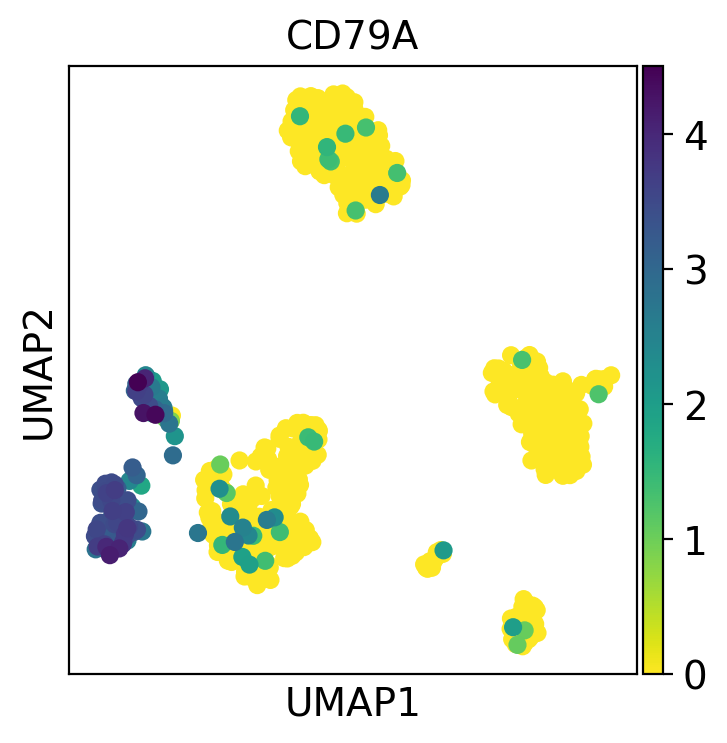

In [9]:
with rc_context({'figure.figsize': (4, 4)}):
  sc.pl.umap(pbmc, color='CD79A')

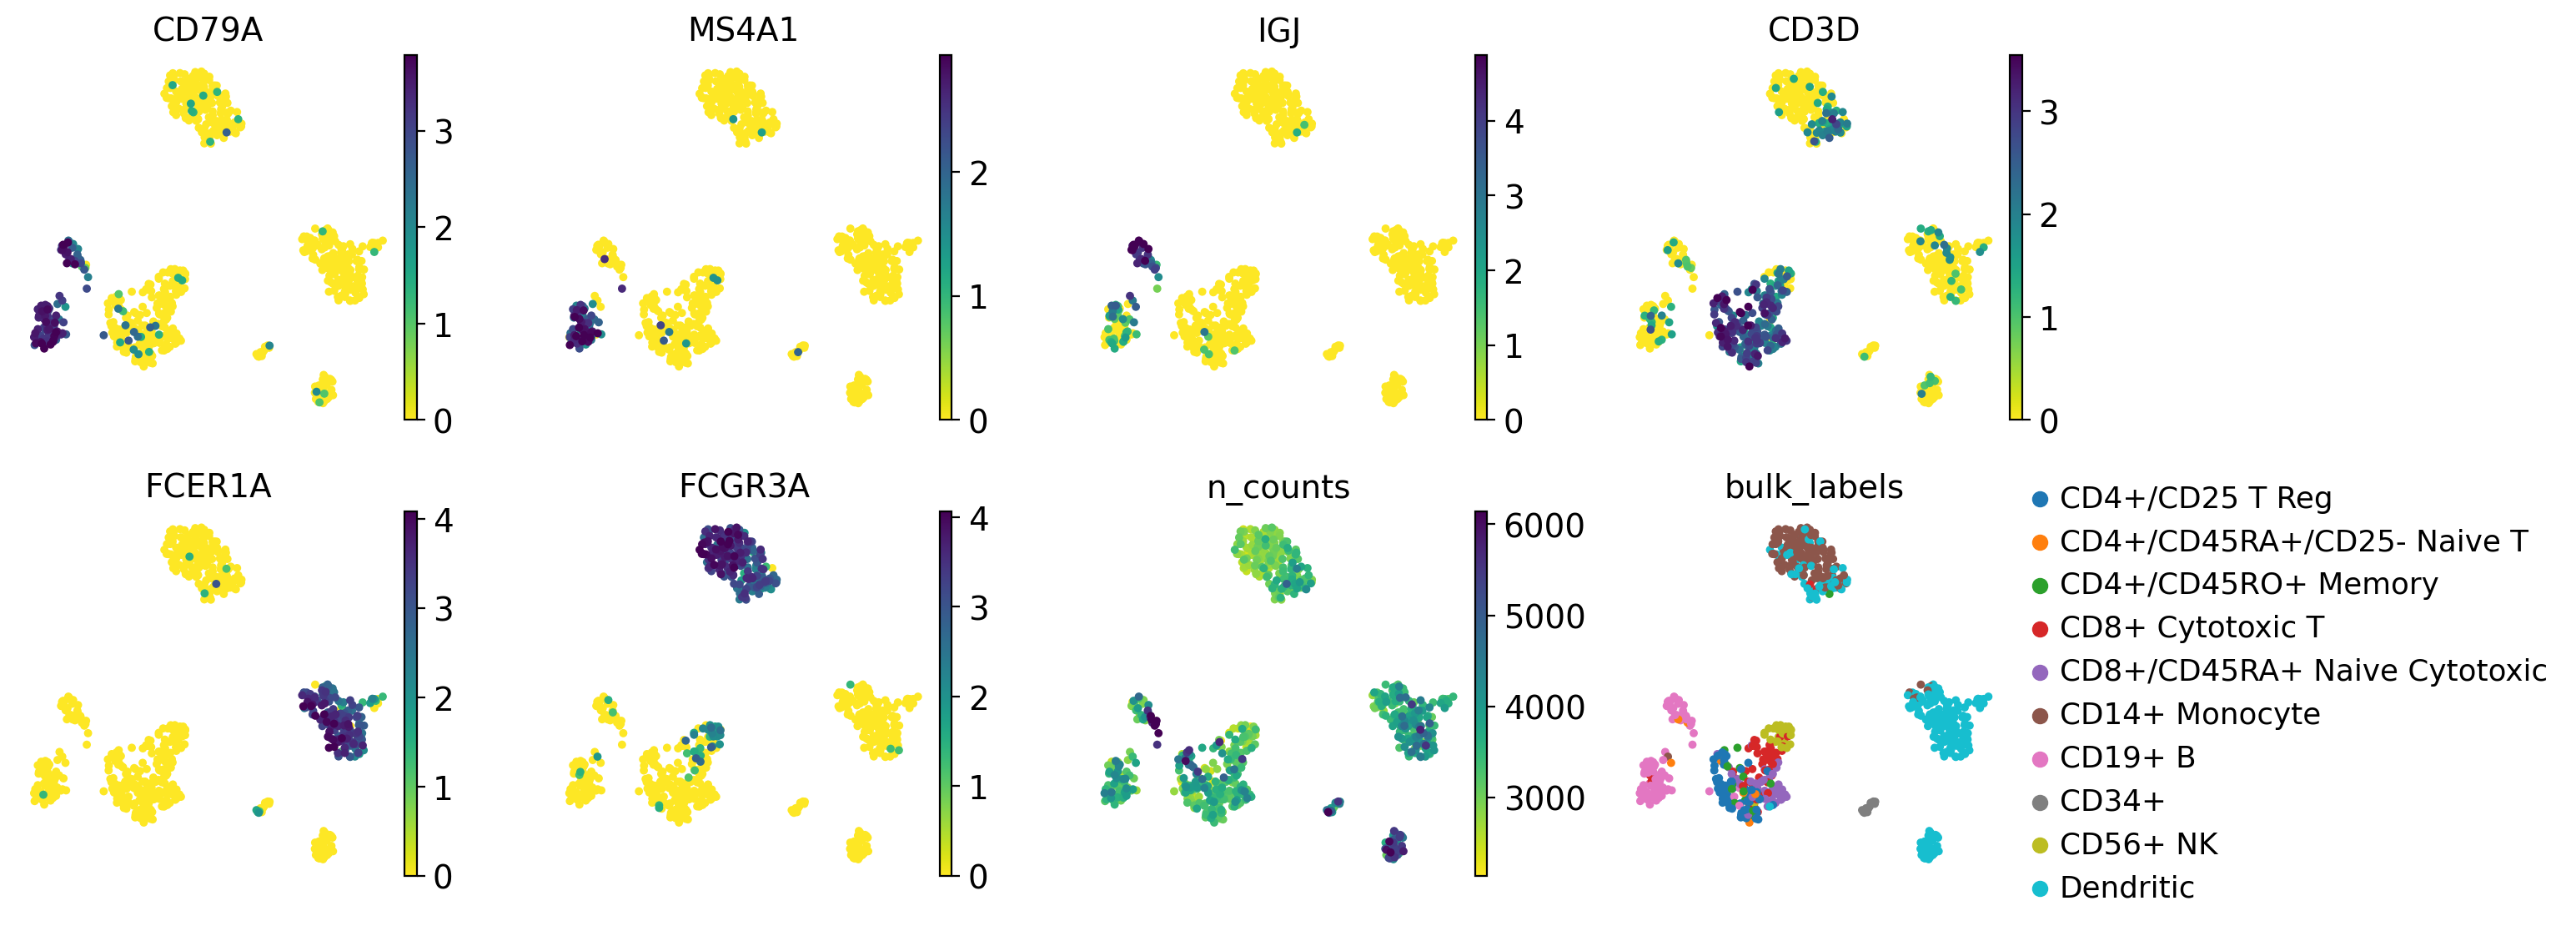

In [10]:
with rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(pbmc, color=['CD79A', 'MS4A1', 'IGJ', 'CD3D', 'FCER1A', 'FCGR3A', 'n_counts', 'bulk_labels'], s=50, frameon=False, ncols=4, vmax='p99')

In [11]:
# compute clusters using the leiden method and store the results with the name `clusters`
sc.tl.leiden(pbmc, key_added='clusters', resolution=0.5)

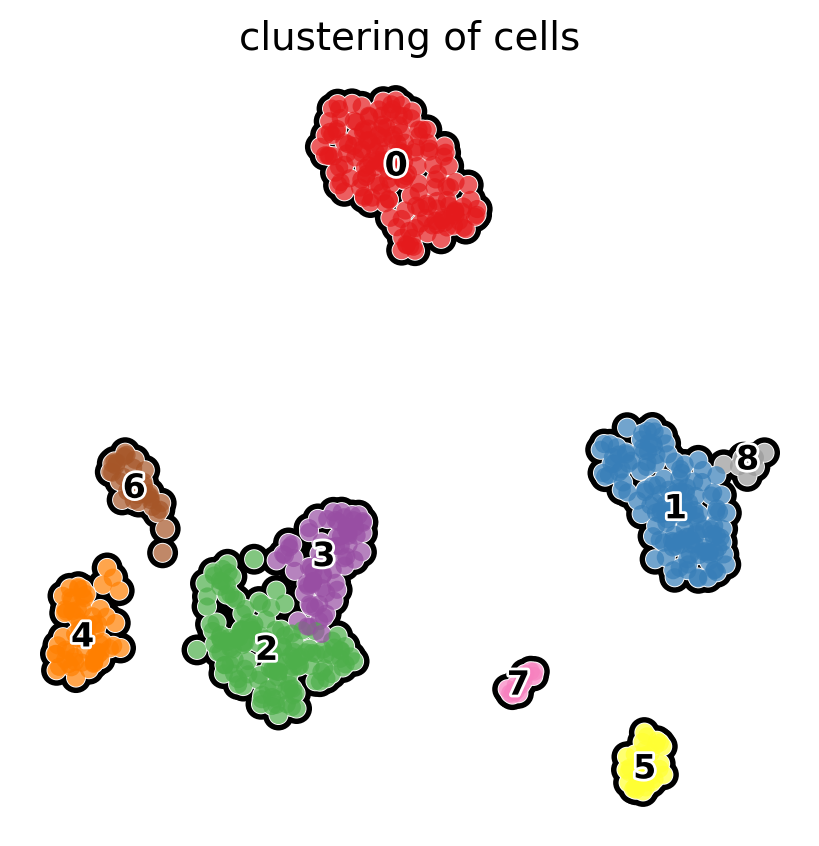

In [12]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(pbmc, color='clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [13]:
# identification of clusters based on known marker genes
marker_genes_dict = {
    'B-cell': ['CD79A', 'MS4A1'],
    'Dendritic': ['FCER1A', 'CST3'],
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],
    'Other': ['IGLL1'],
    'Plasma': ['IGJ'],
    'T-cell': ['CD3D'],
}

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


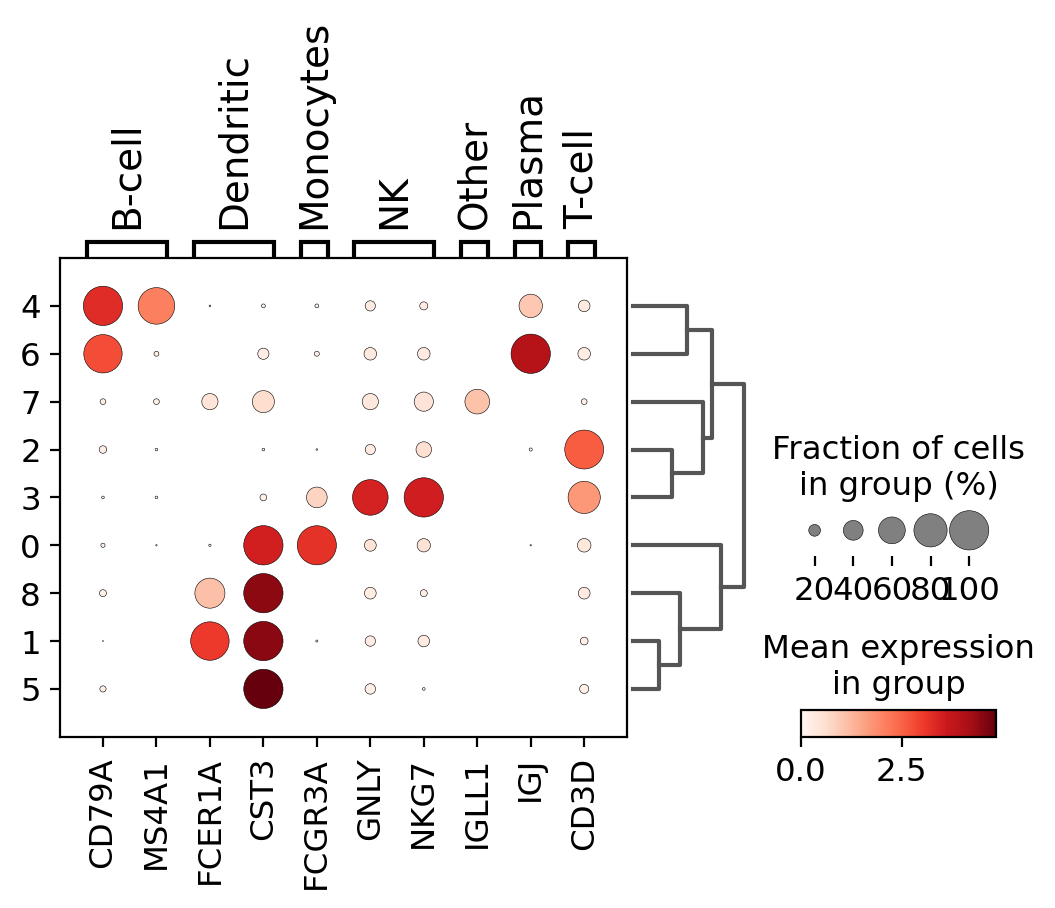

In [14]:
# dotplot: HAC for dendrogram is calculated automatically using the correlation of the PCA components btw clusters
sc.pl.dotplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True)

In [15]:
# from the plot above, we can manually annotate the cluster
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     '0': 'Monocytes',
     '1': 'Dendritic',
     '2': 'T-cell',
     '3': 'NK',
     '4': 'B-cell',
     '5': 'Dendritic',
     '6': 'Plasma',
     '7': 'Other',
     '8': 'Dendritic',
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
pbmc.obs['cell type'] = pbmc.obs['clusters'].map(cluster2annotation).astype('category')

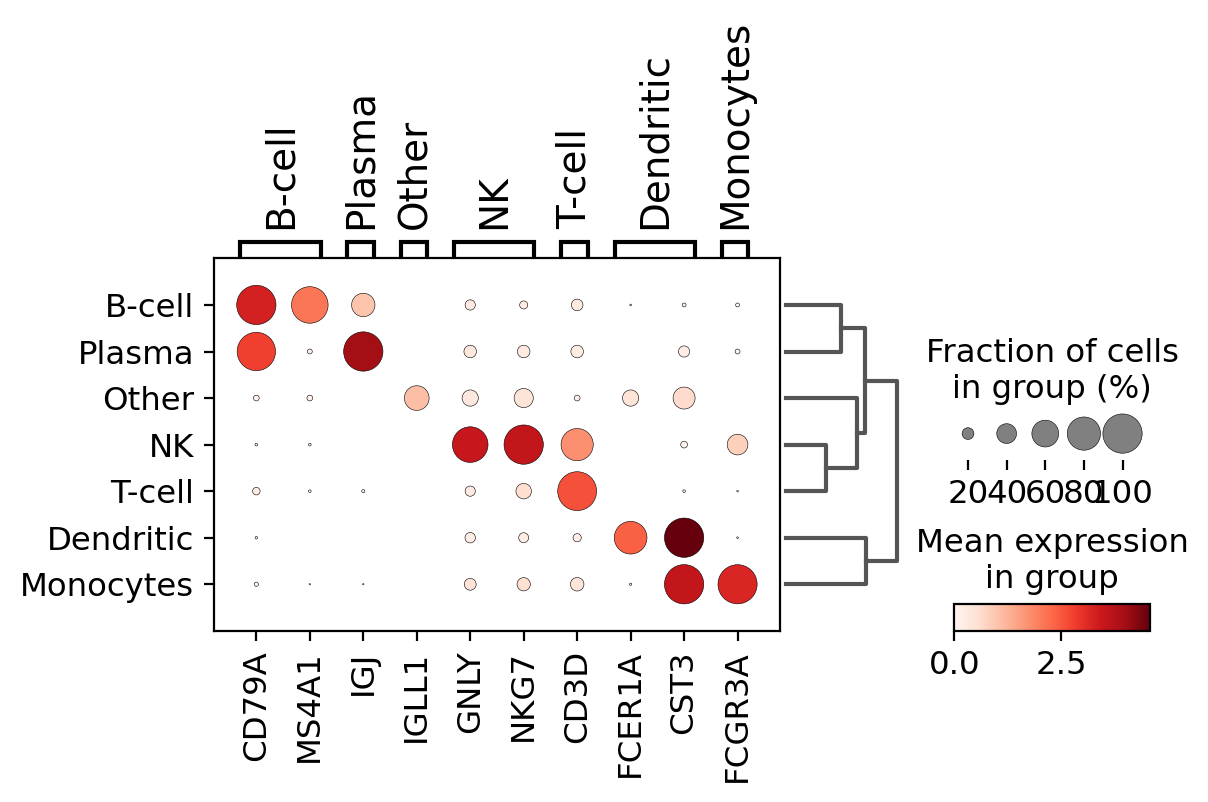

In [16]:
sc.pl.dotplot(pbmc, marker_genes_dict, 'cell type', dendrogram=True)

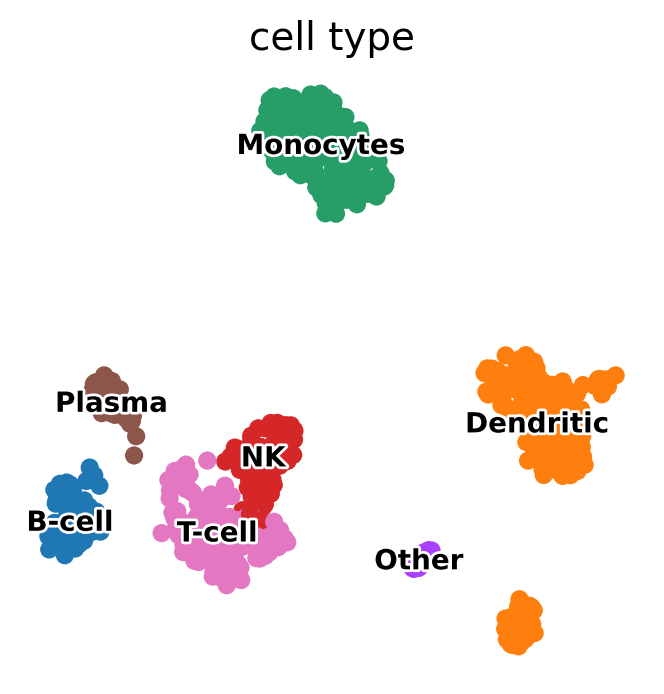

In [17]:
sc.pl.umap(pbmc, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)

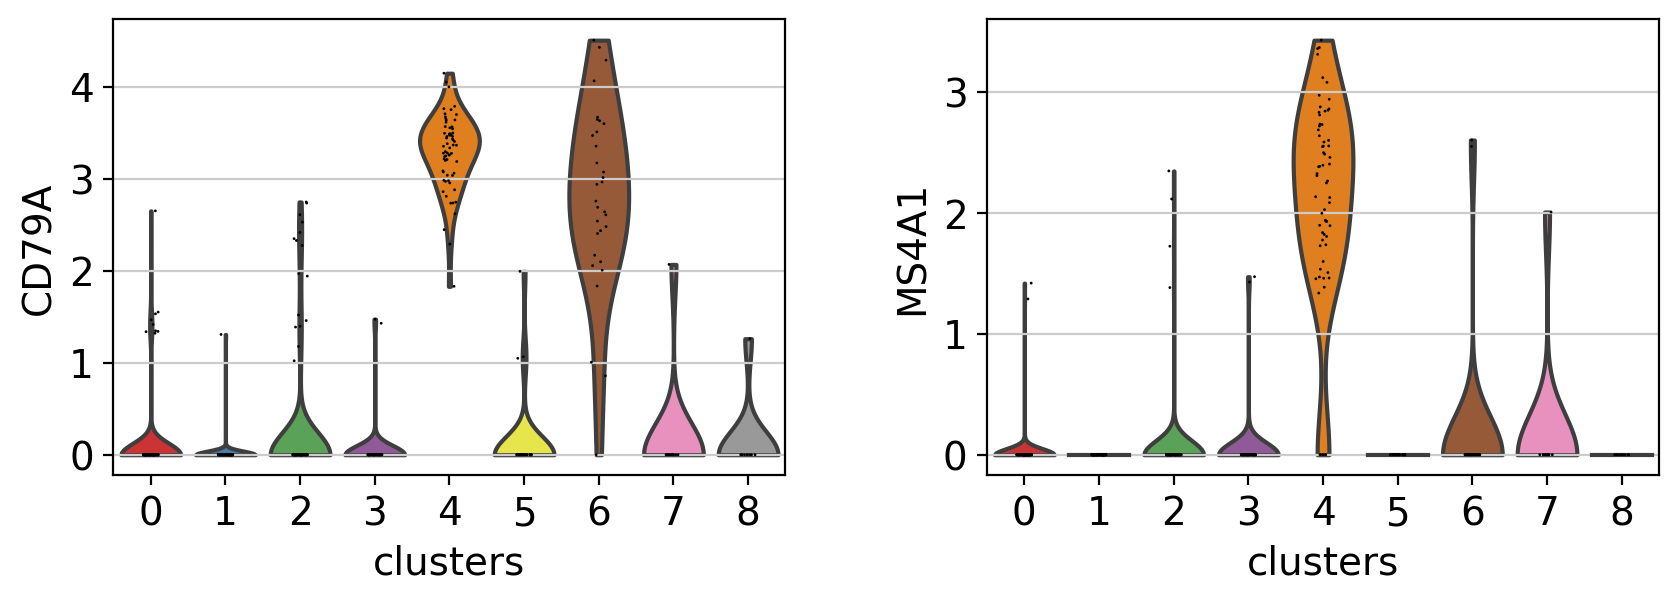

In [18]:
with rc_context({'figure.figsize': (4.5, 3)}):
  sc.pl.violin(pbmc, ['CD79A', 'MS4A1'], groupby='clusters')

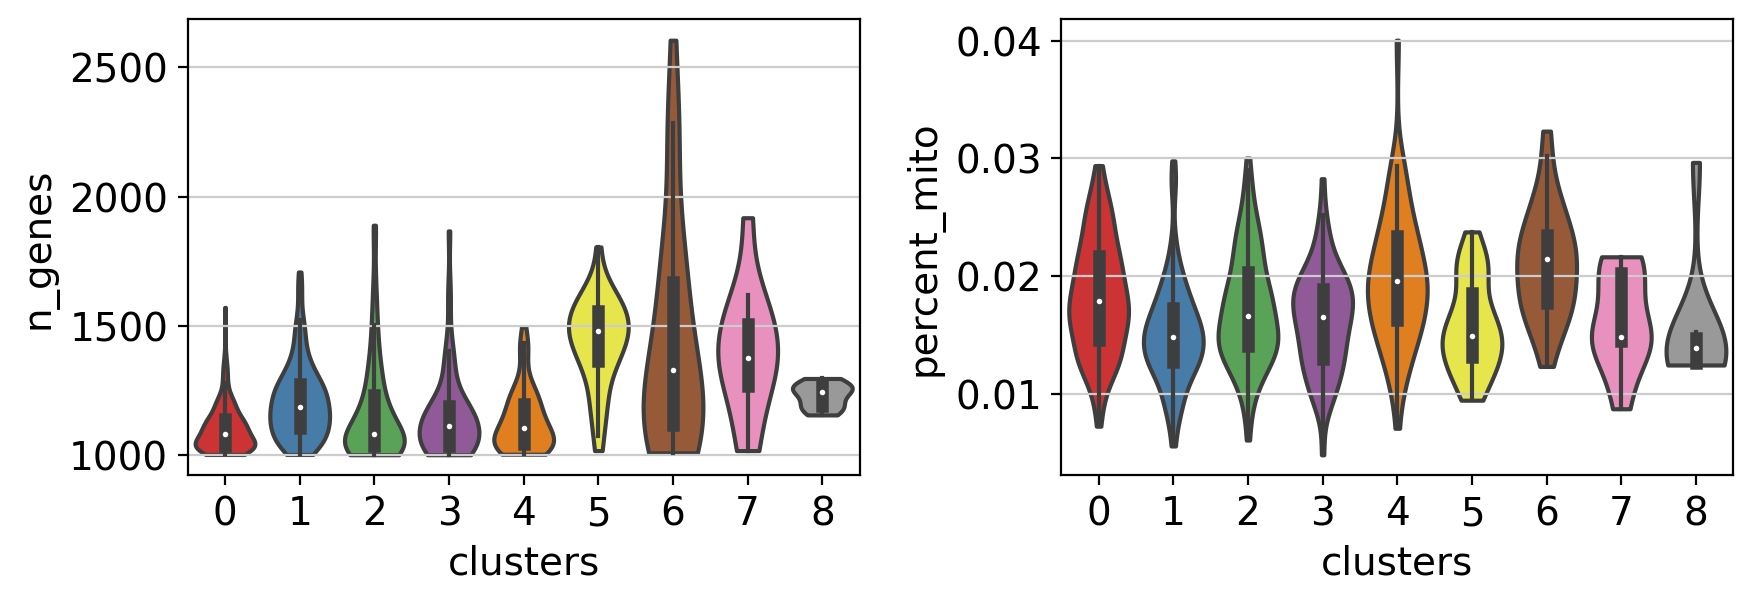

In [19]:
with rc_context({'figure.figsize': (4.5, 3)}):
  sc.pl.violin(pbmc, ['n_genes', 'percent_mito'], groupby='clusters', stripplot=False, inner='box')

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


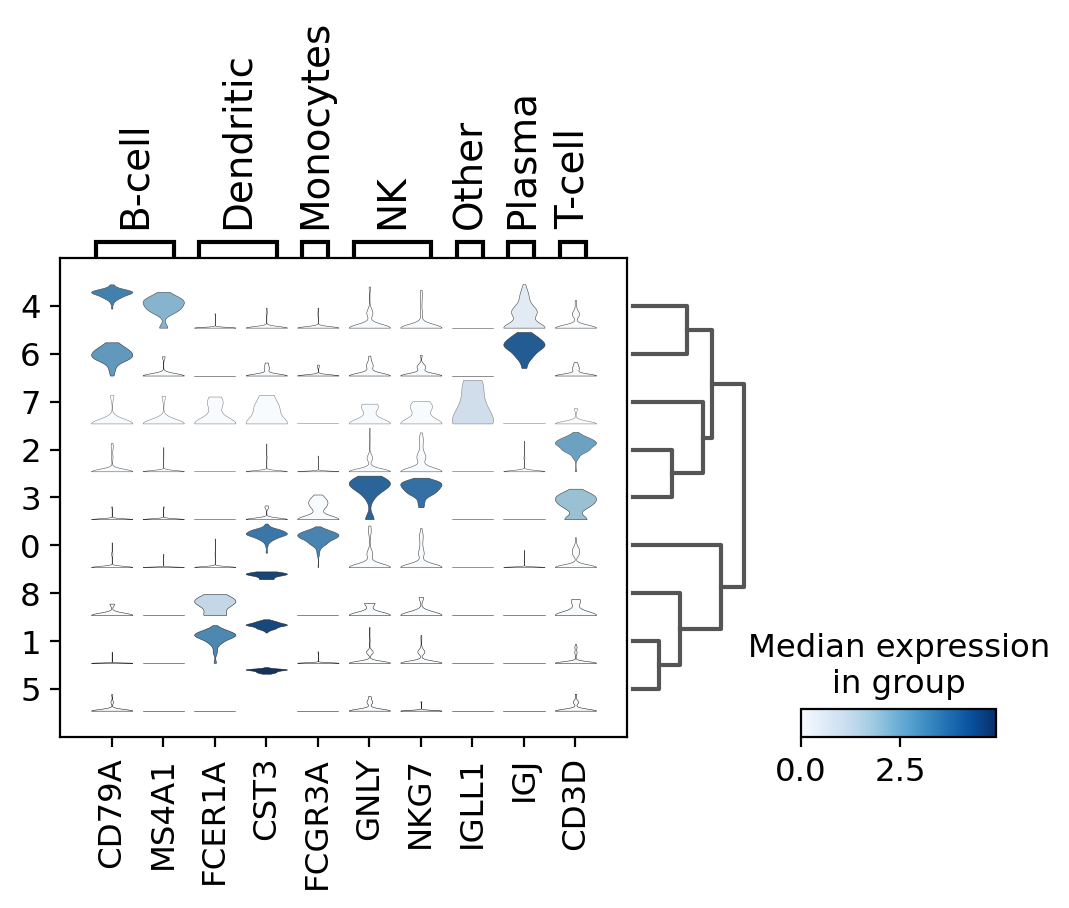

In [20]:
ax = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='clusters', swap_axes=False, dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


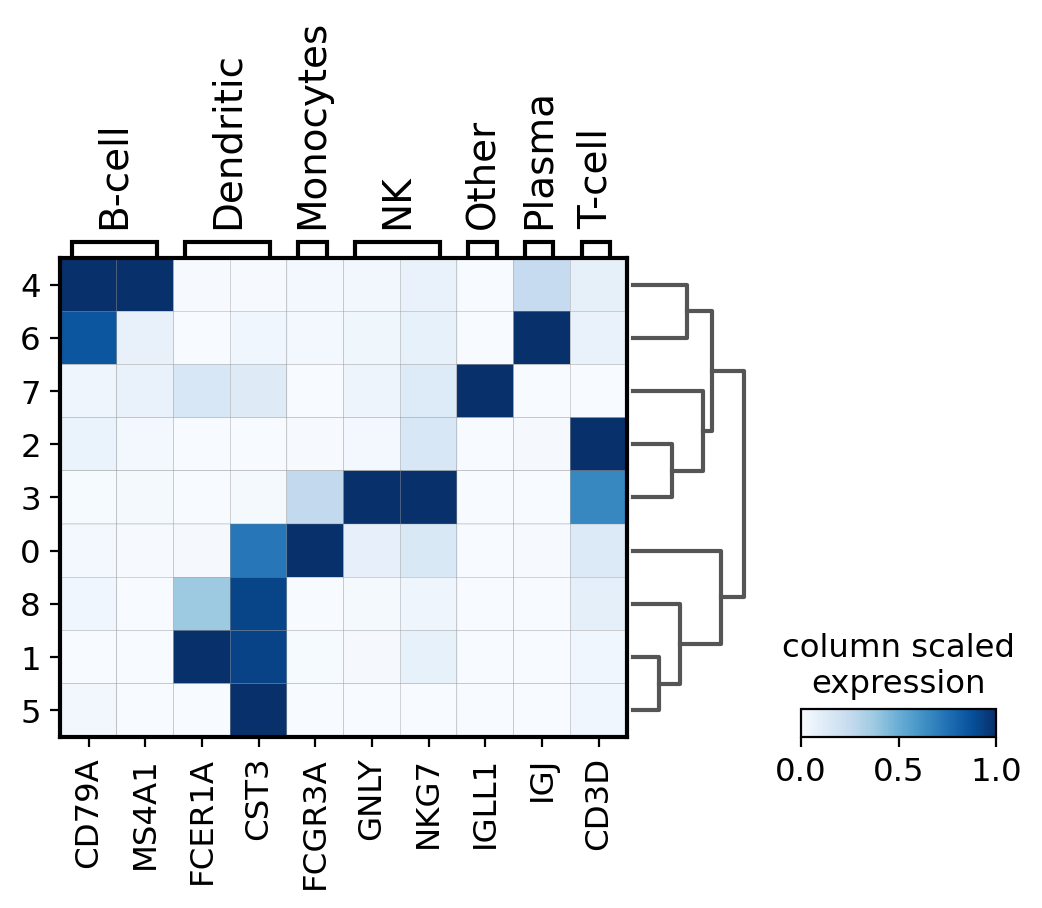

In [21]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

In [22]:
# normalize the gene expression
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


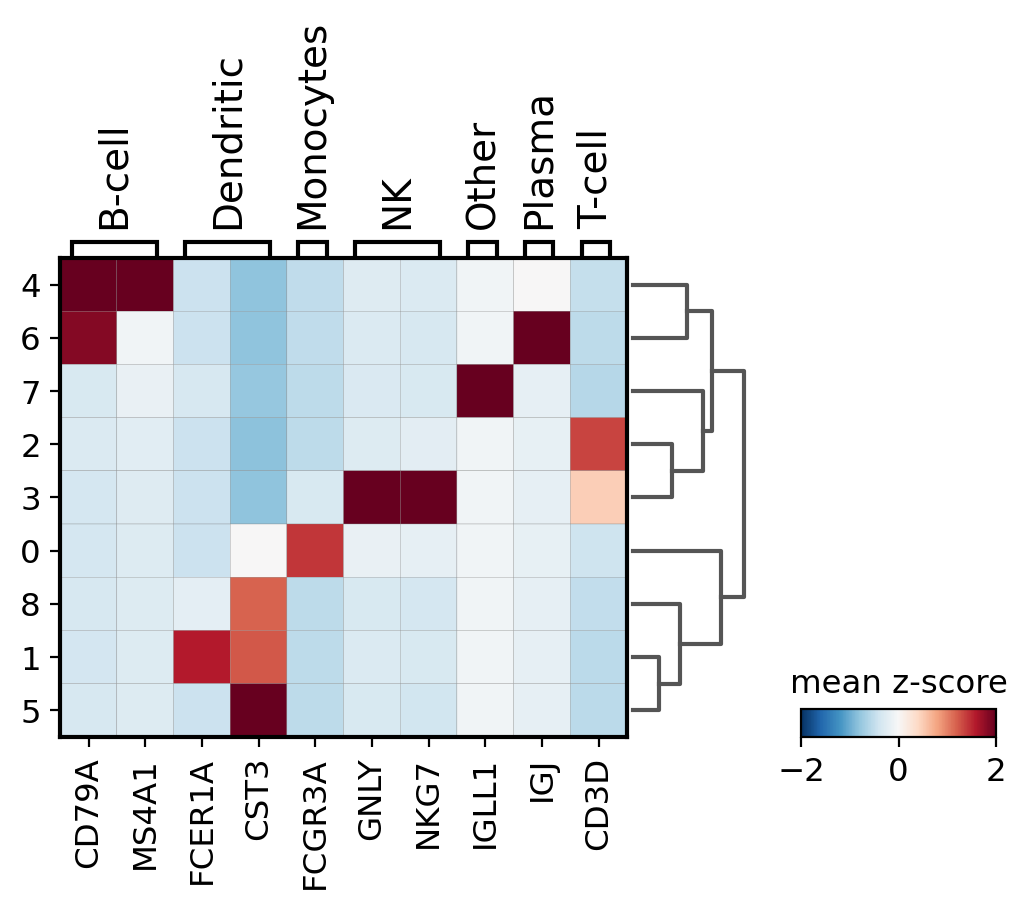

In [23]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

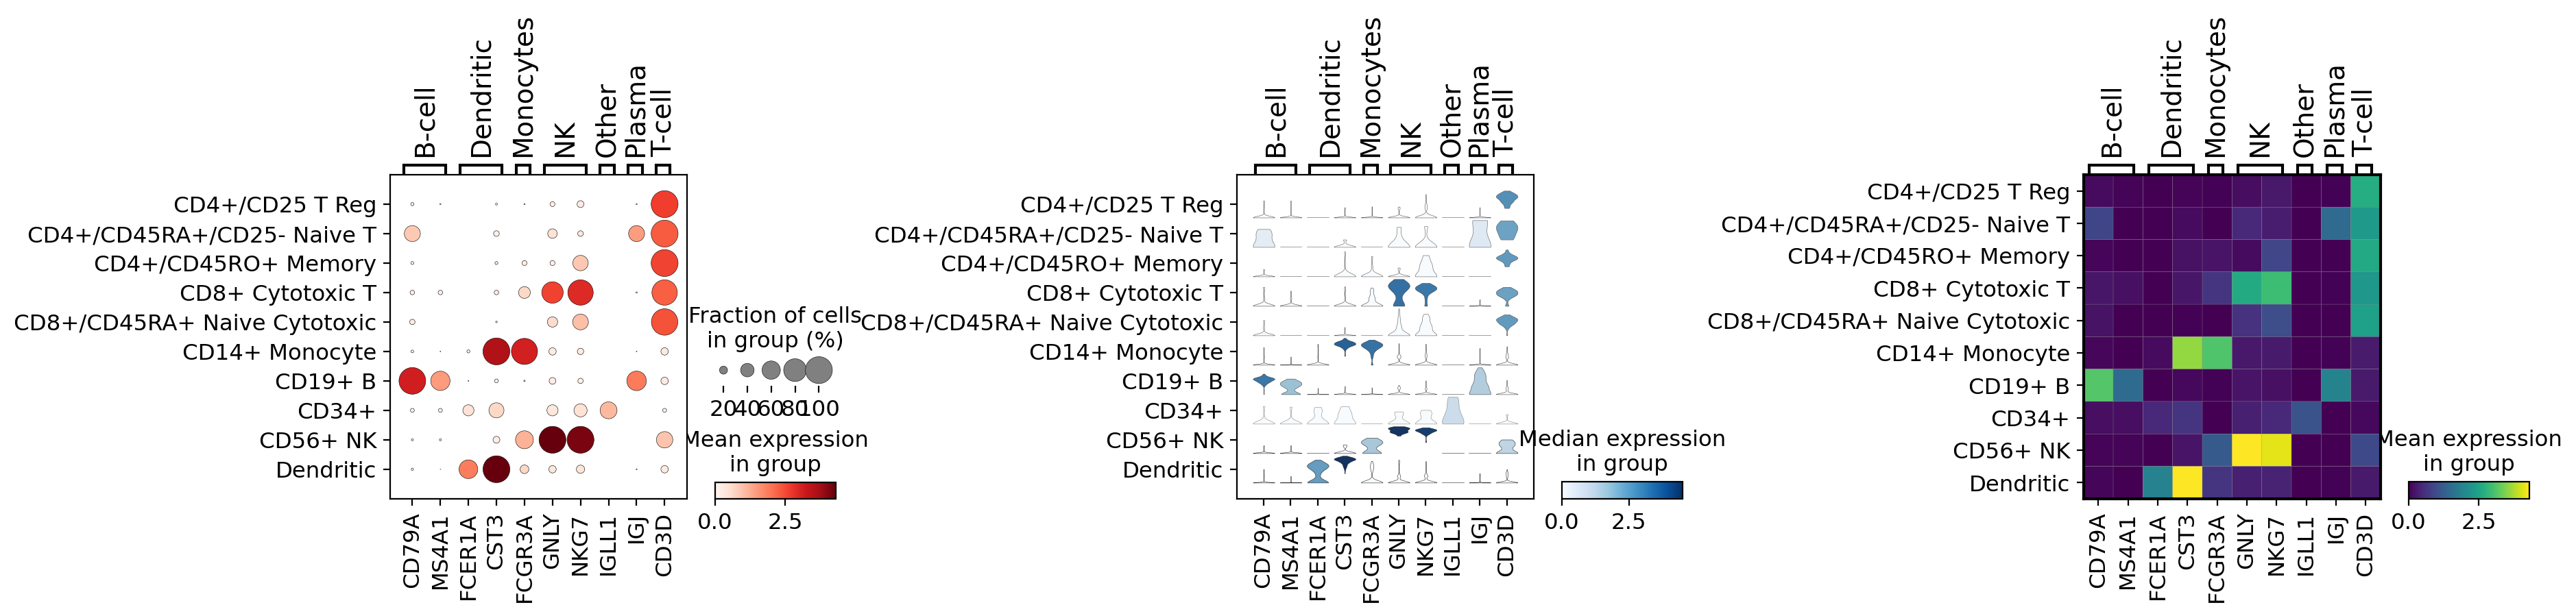

In [26]:
# Combining plots in subplots
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4), gridspec_kw={'wspace': 0.9})

ax1_dict = sc.pl.dotplot(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax1, show=False)
ax2_dict = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax2, show=False)
ax3_dict = sc.pl.matrixplot(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax3, show=False, cmap='viridis')

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


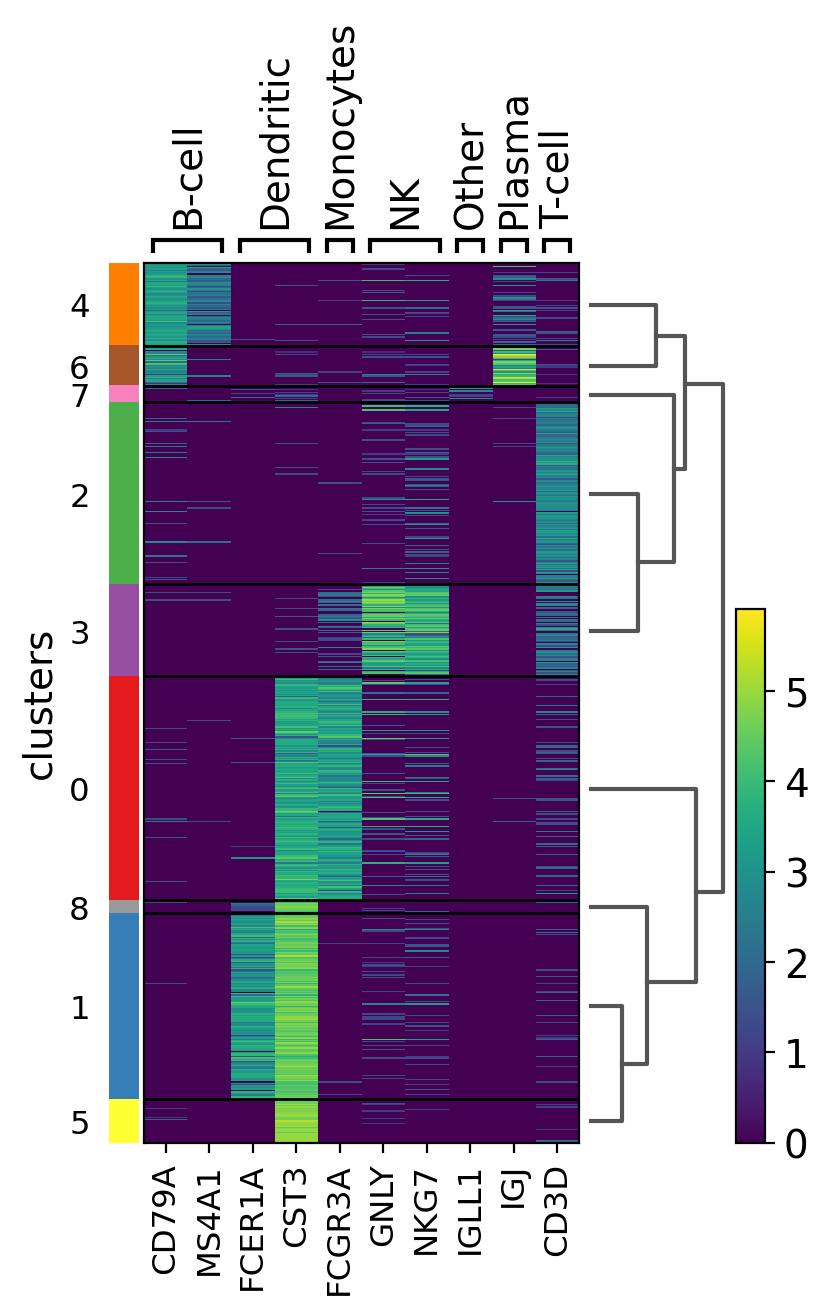

In [28]:
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters', cmap='viridis', dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


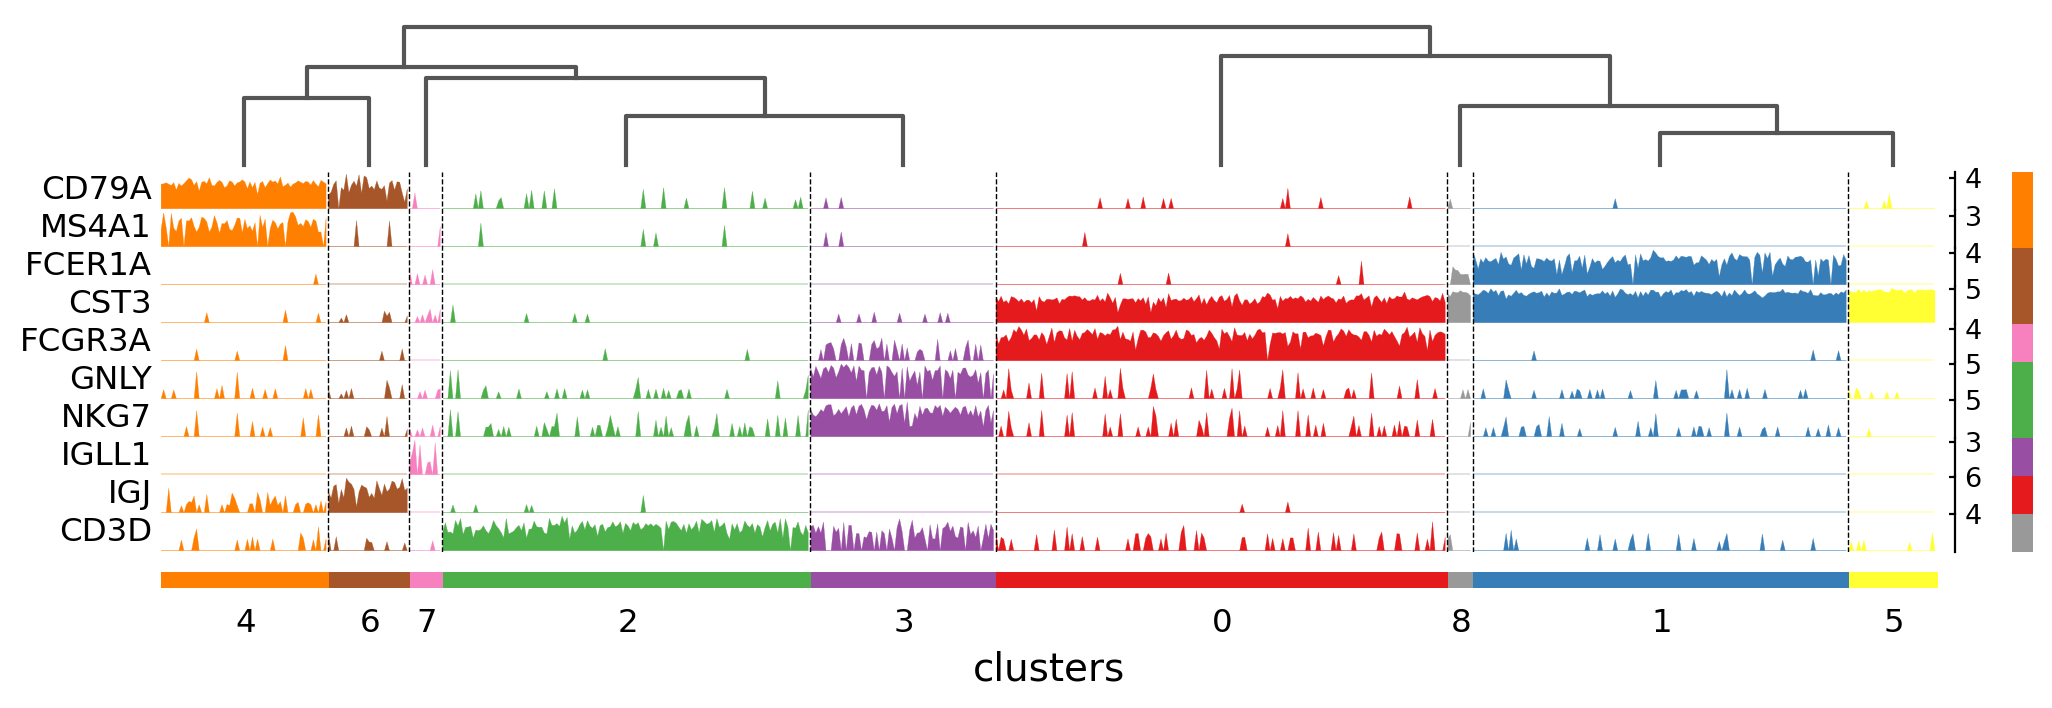

In [29]:
ax = sc.pl.tracksplot(pbmc, marker_genes_dict, groupby='clusters', dendrogram=True)

In [30]:
sc.tl.rank_genes_groups(pbmc, groupby='clusters', method='wilcoxon')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


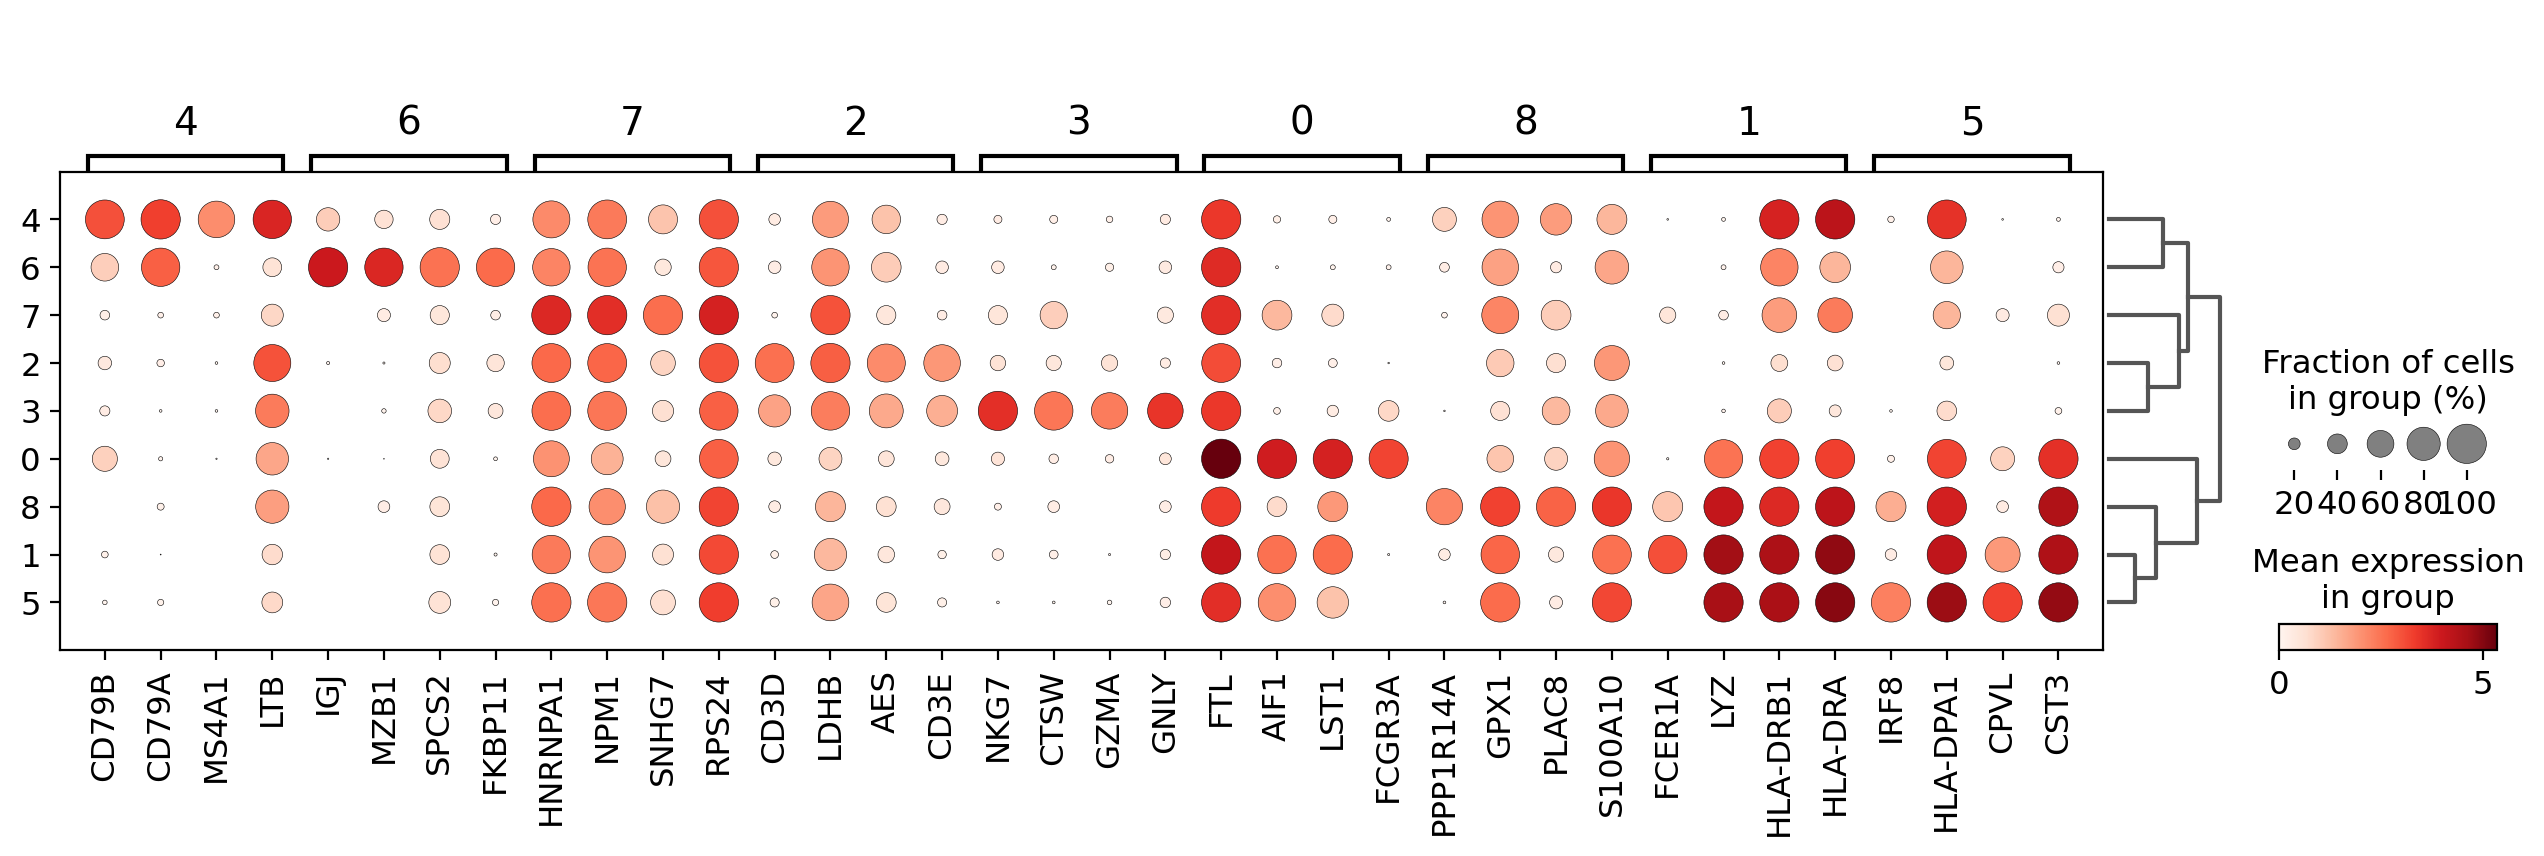

In [31]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4)

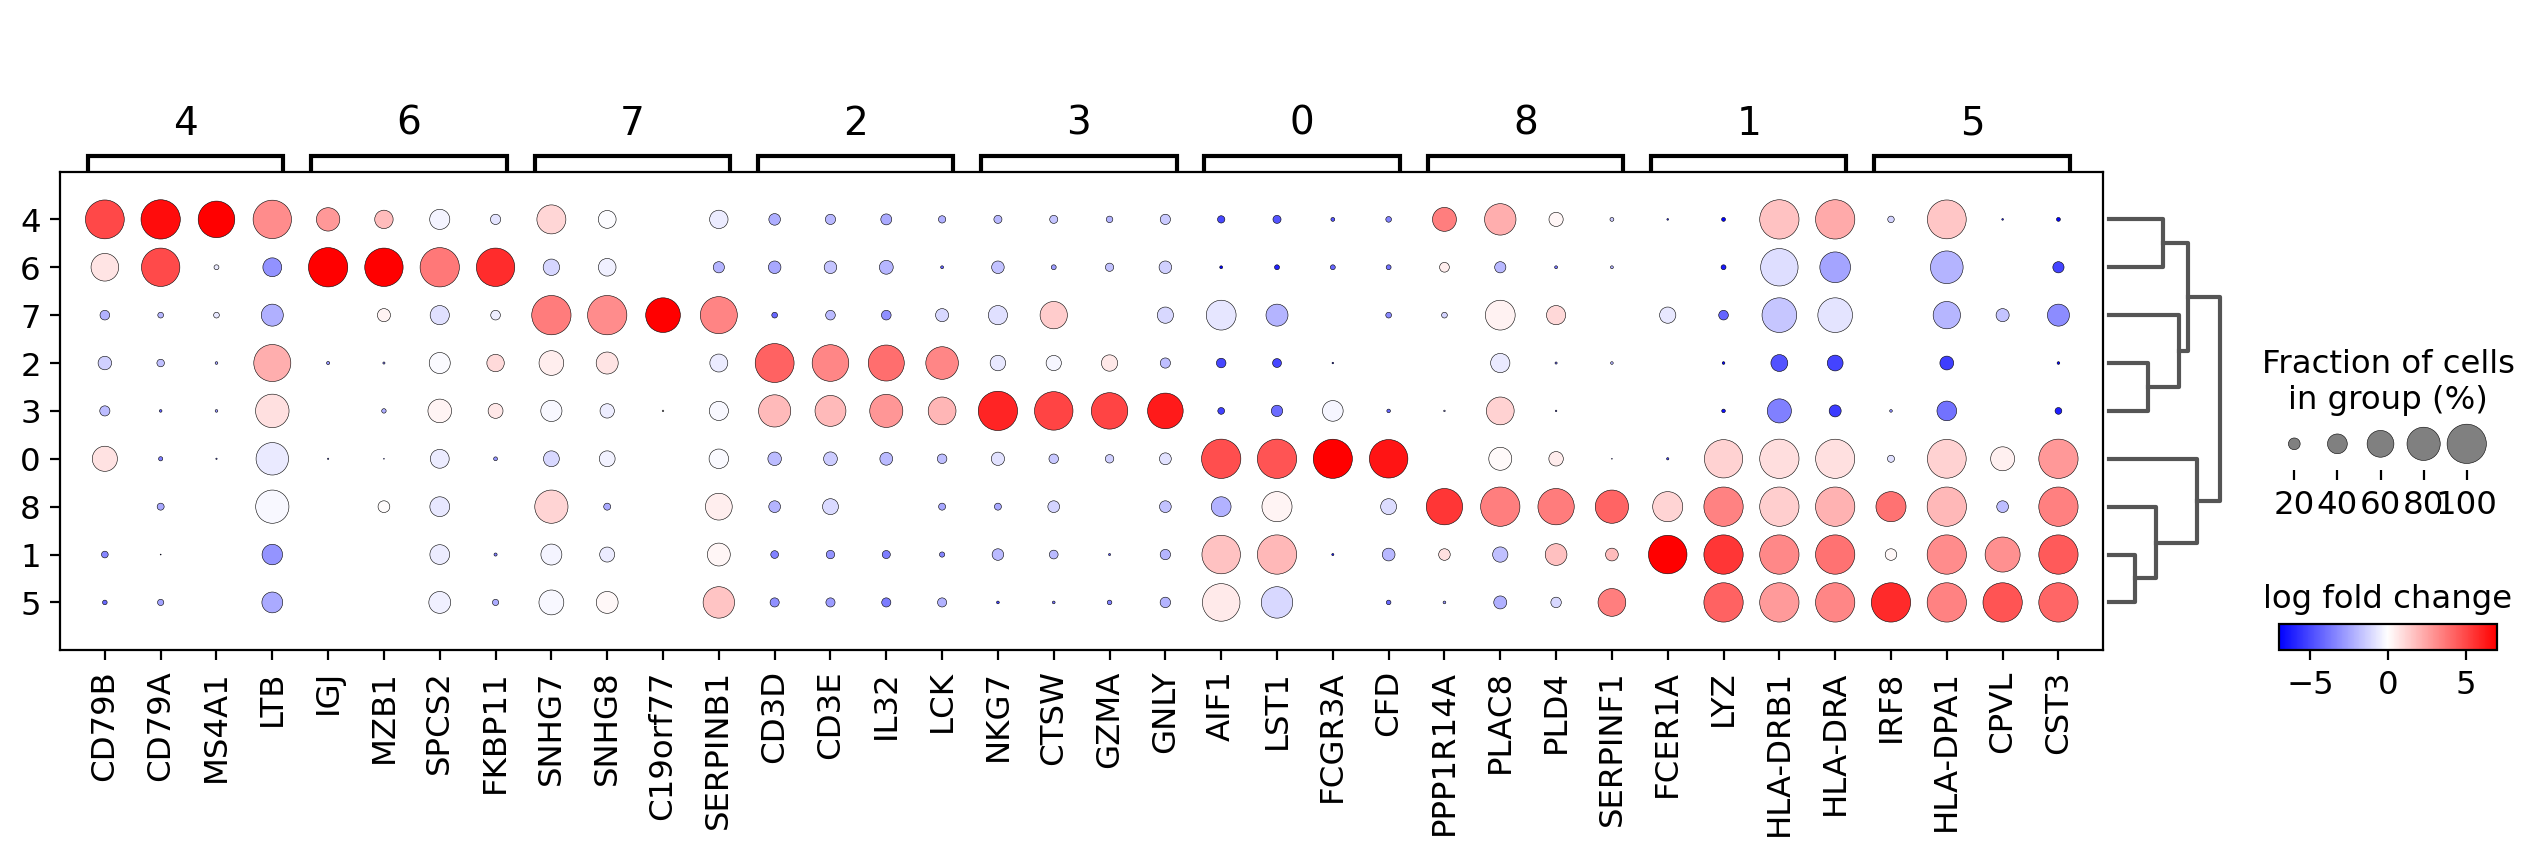

In [32]:
# better representation -> use logfoldchange
# logfoldchange: between cell type expression and the rest of cells
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4, values_to_plot='logfoldchanges', min_logfoldchange=3, vmax=7, vmin=-7, cmap='bwr')

categories: 0, 1, 2, etc.
var_group_labels: 1, 5


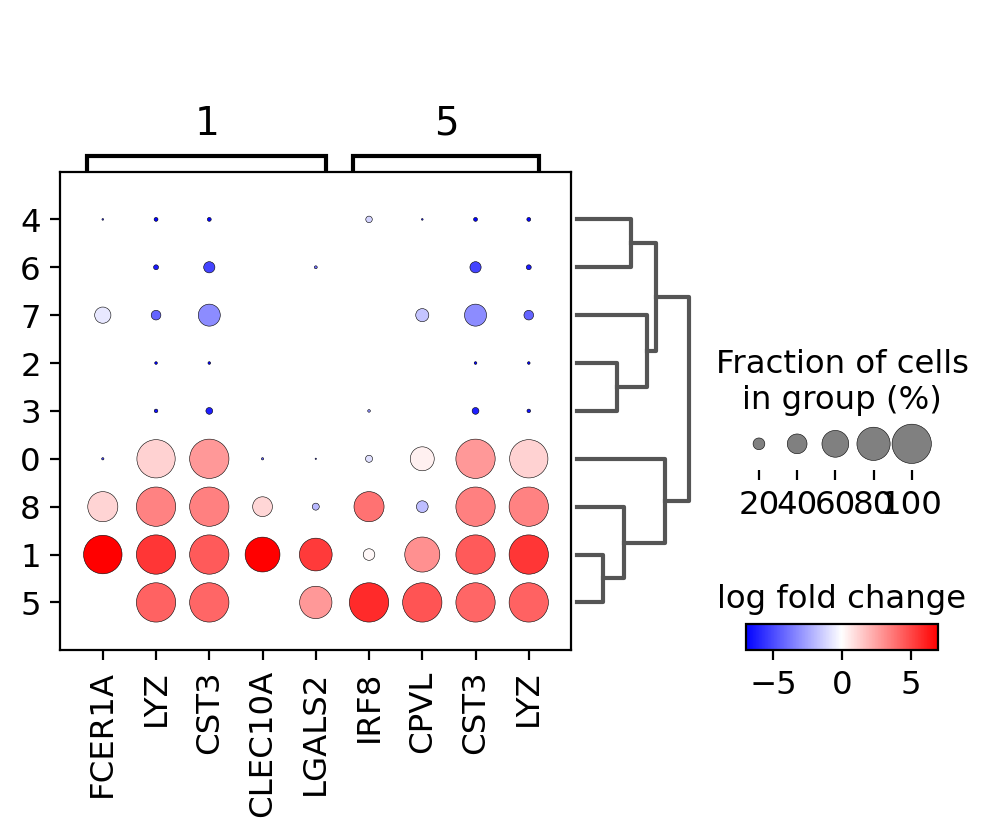

In [33]:
# focusing only on 2 groups
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=30, values_to_plot='logfoldchanges', min_logfoldchange=4, vmax=7, vmin=-7, cmap='bwr', groups=['1', '5'])

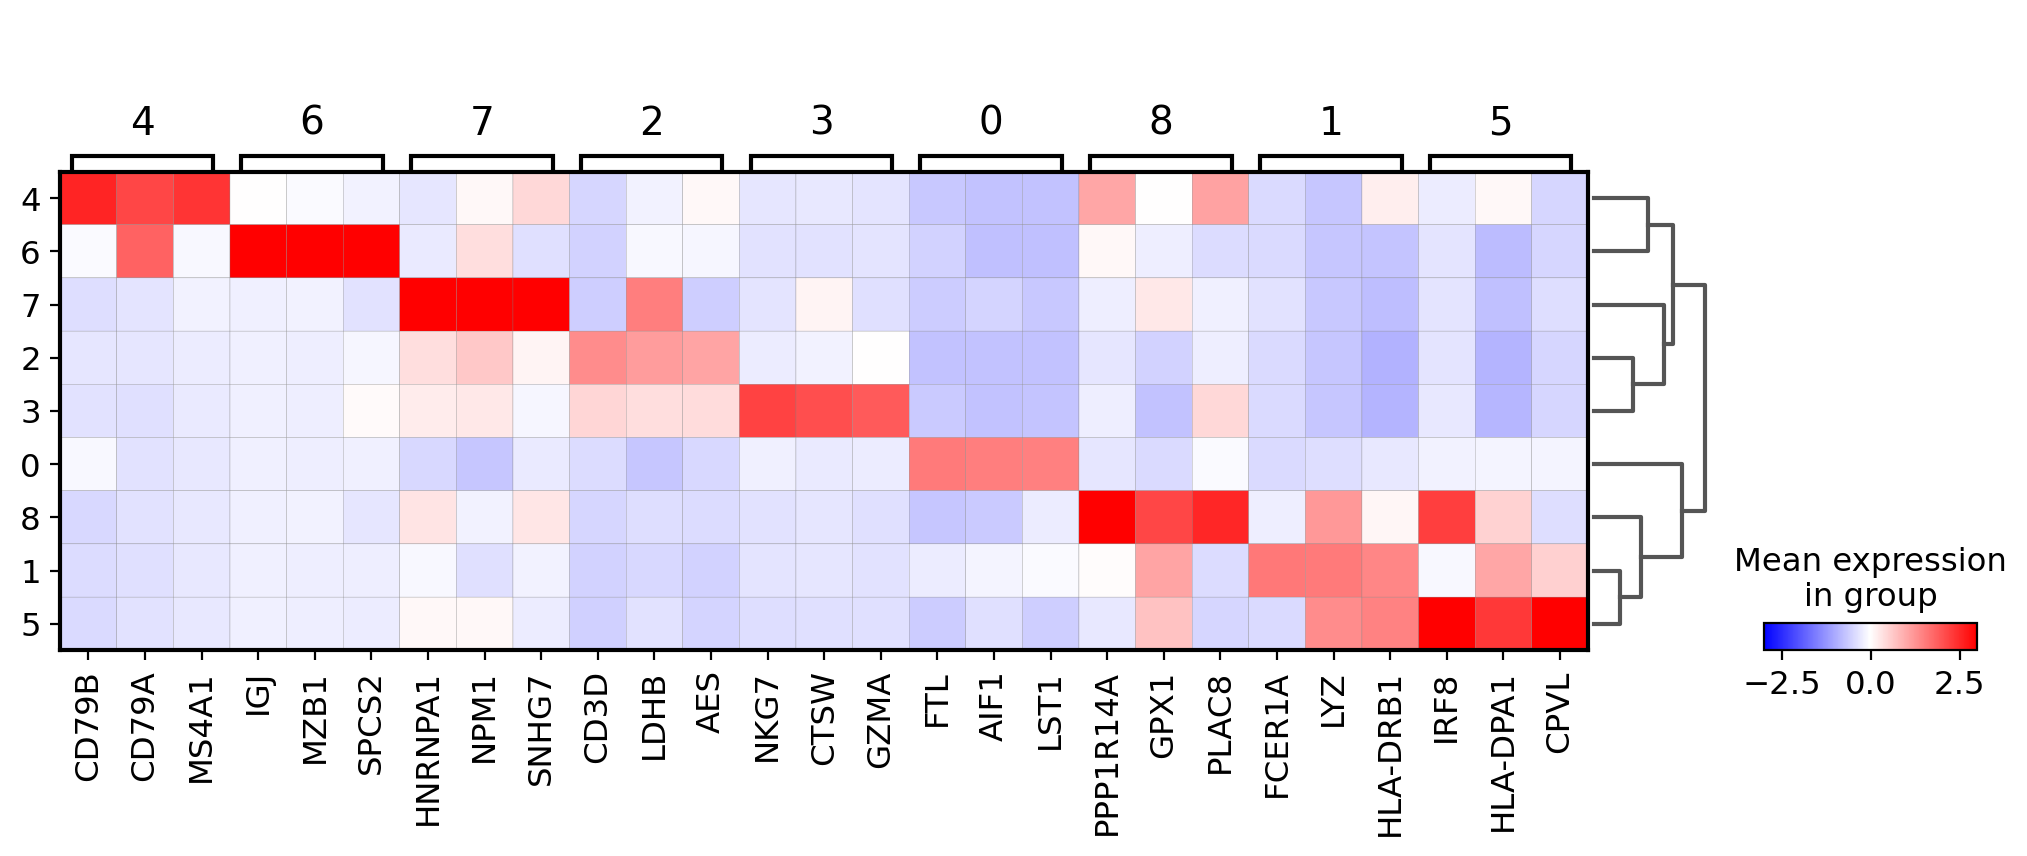

In [34]:
sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, use_raw=False, vmin=-3, vmax=3, cmap='bwr', layer='scaled')

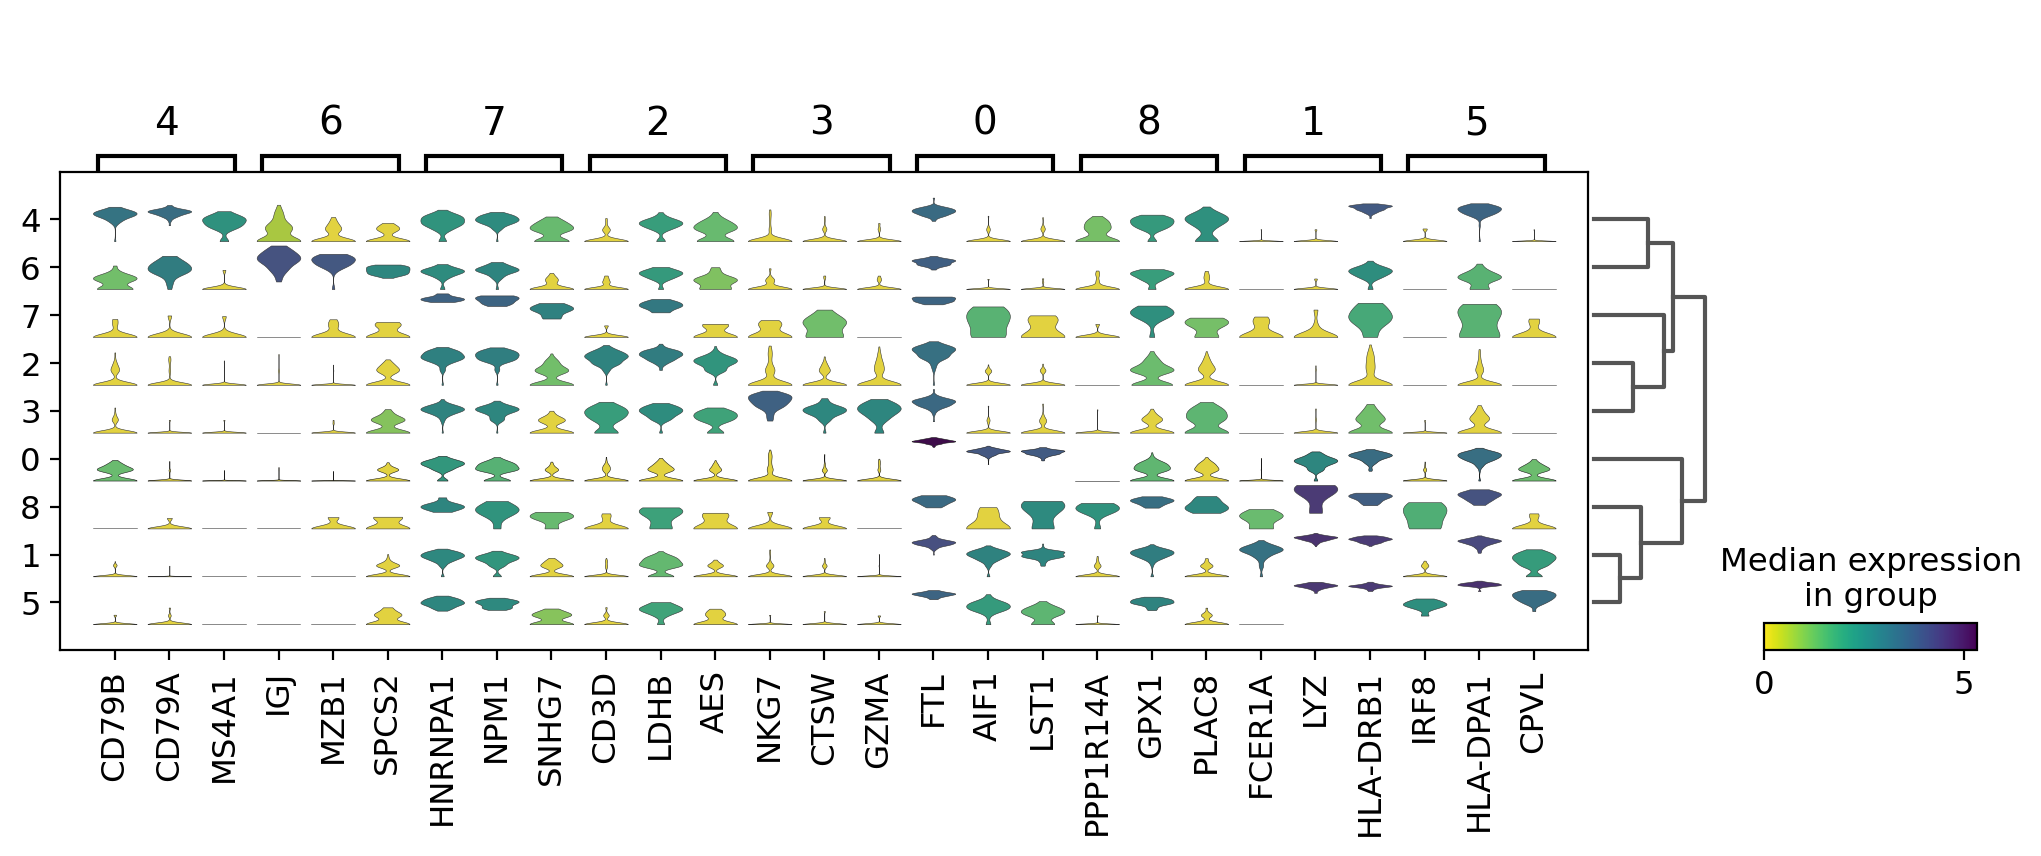

In [35]:
sc.pl.rank_genes_groups_stacked_violin(pbmc, n_genes=3, cmap='viridis_r')

{'dendrogram_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f708e5f3fd0>,
 'gene_groups_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f708e5f3cd0>,
 'groupby_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f708e684f90>,
 'heatmap_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f709629d5d0>}

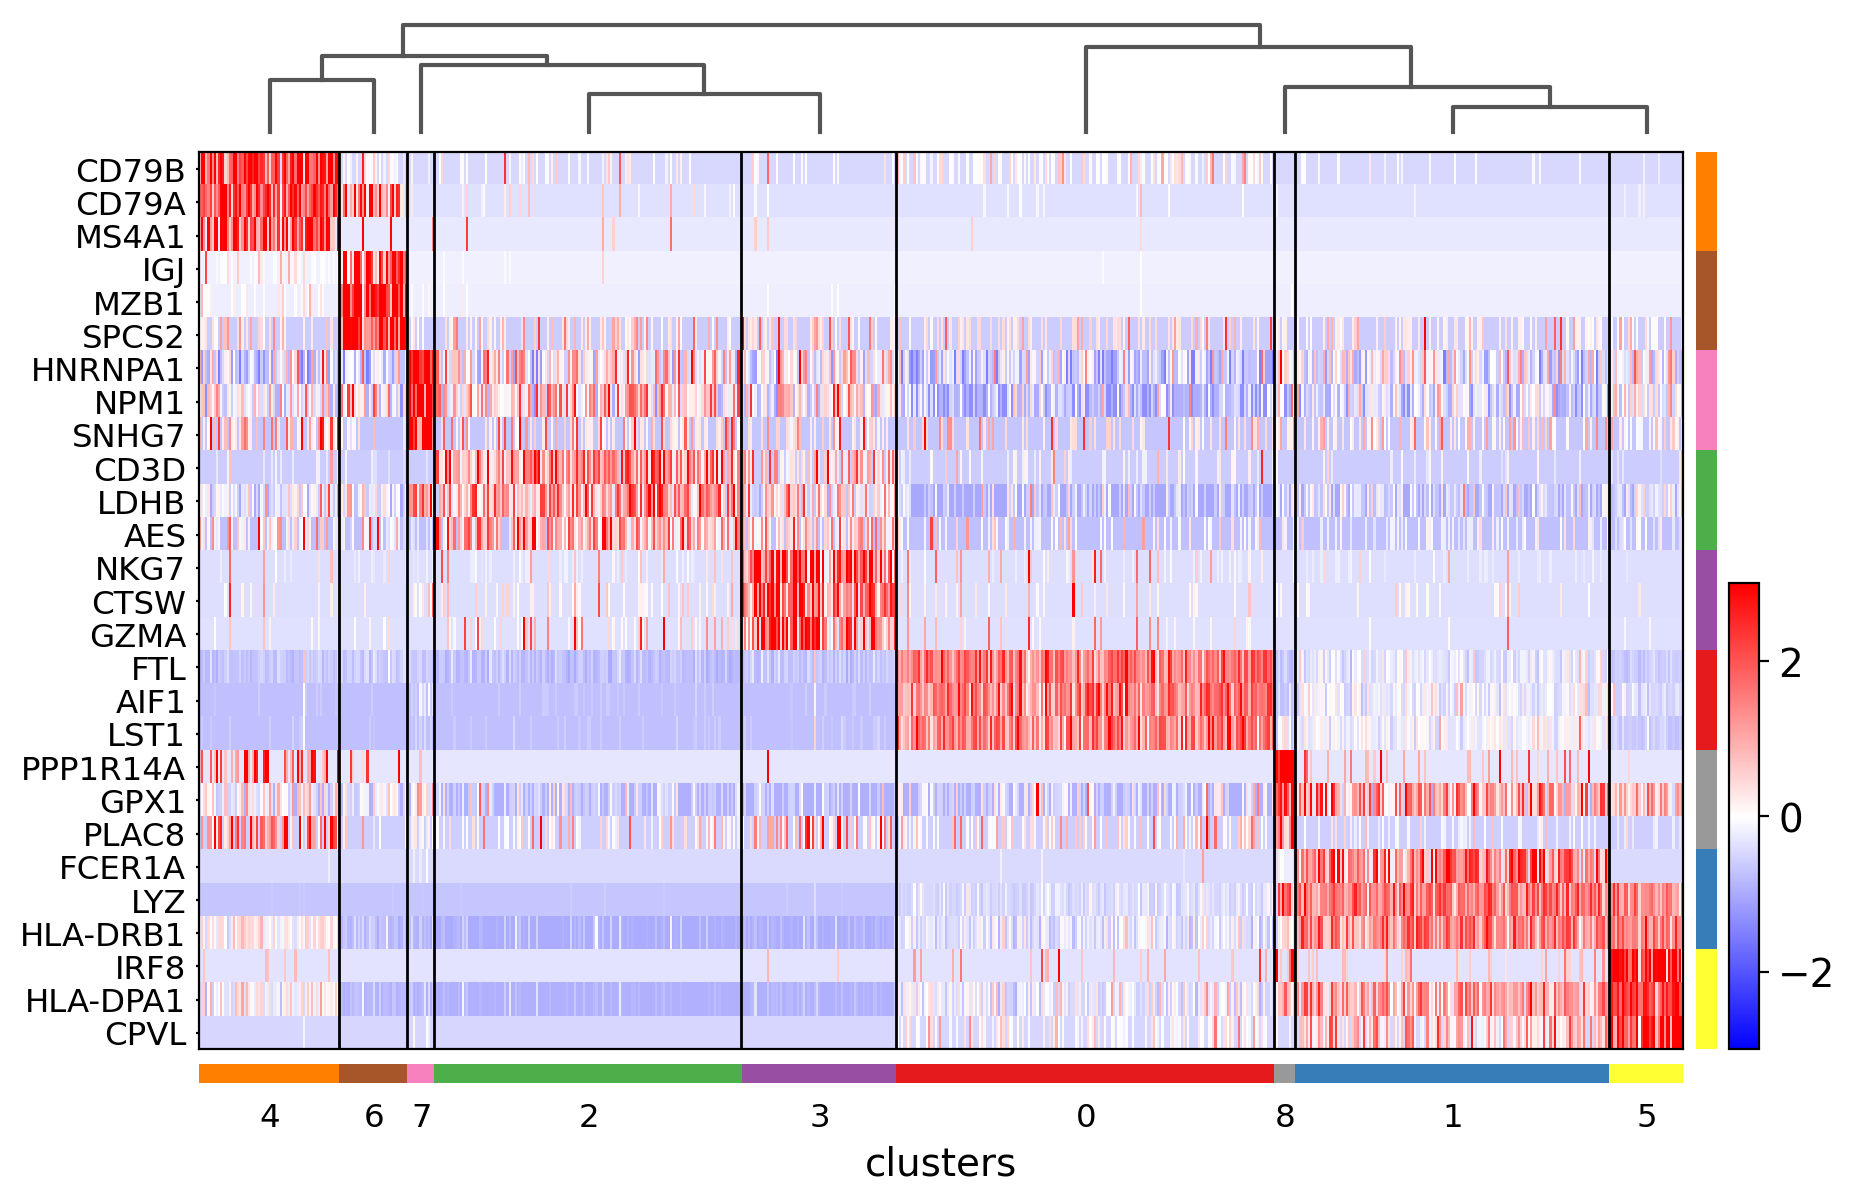

In [36]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr',
                                layer='scaled', figsize=(10, 7), show=False)

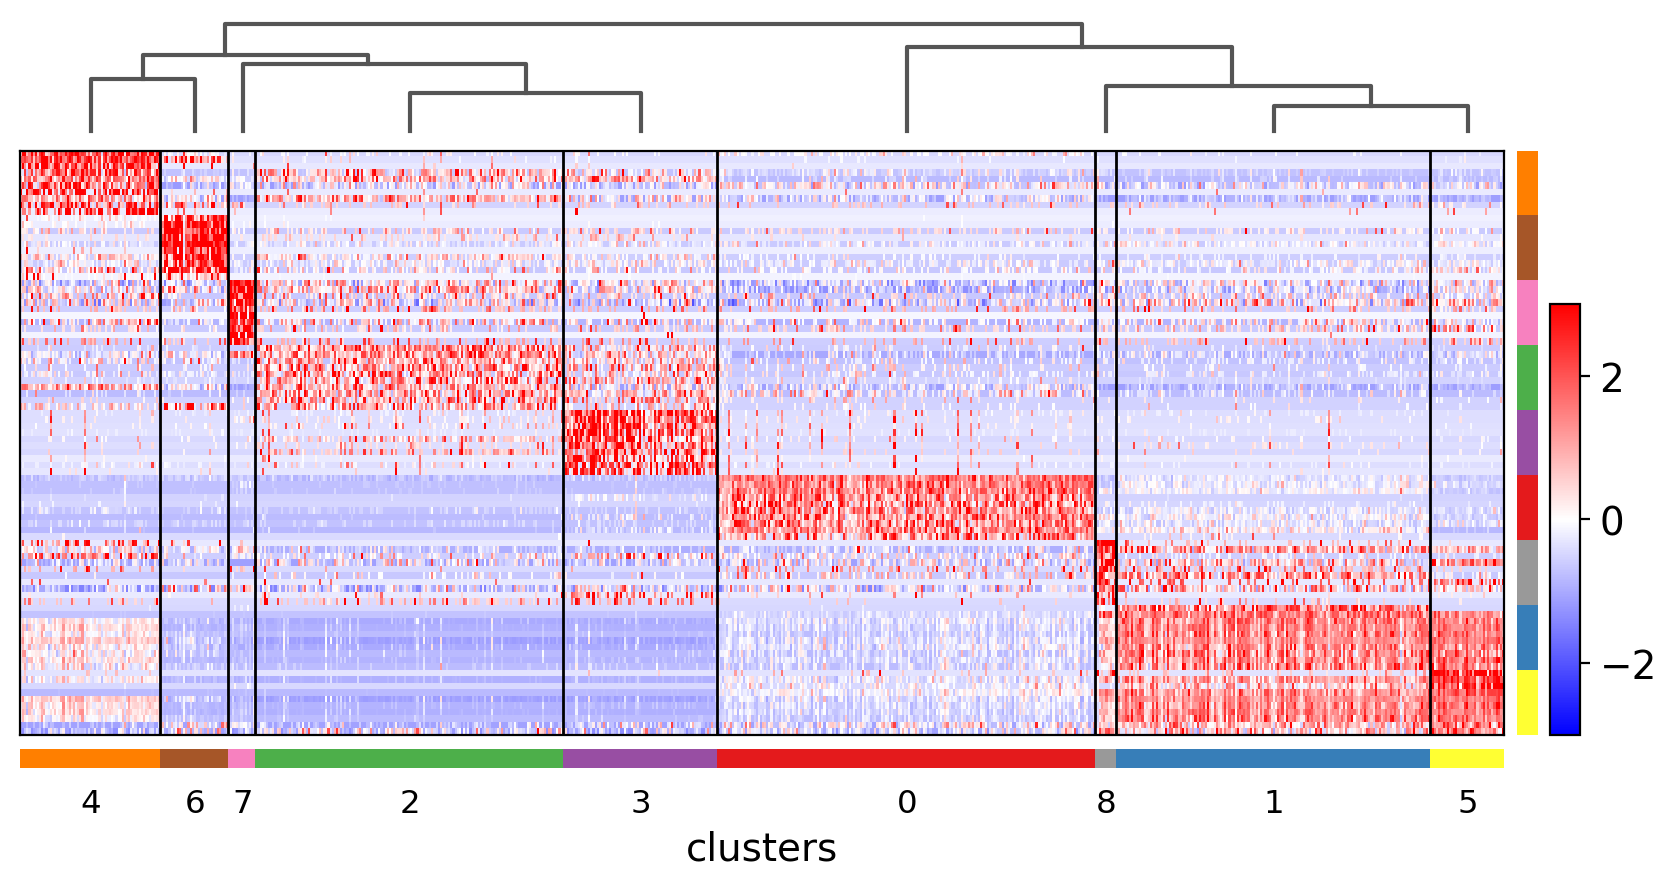

In [37]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3, cmap='bwr')

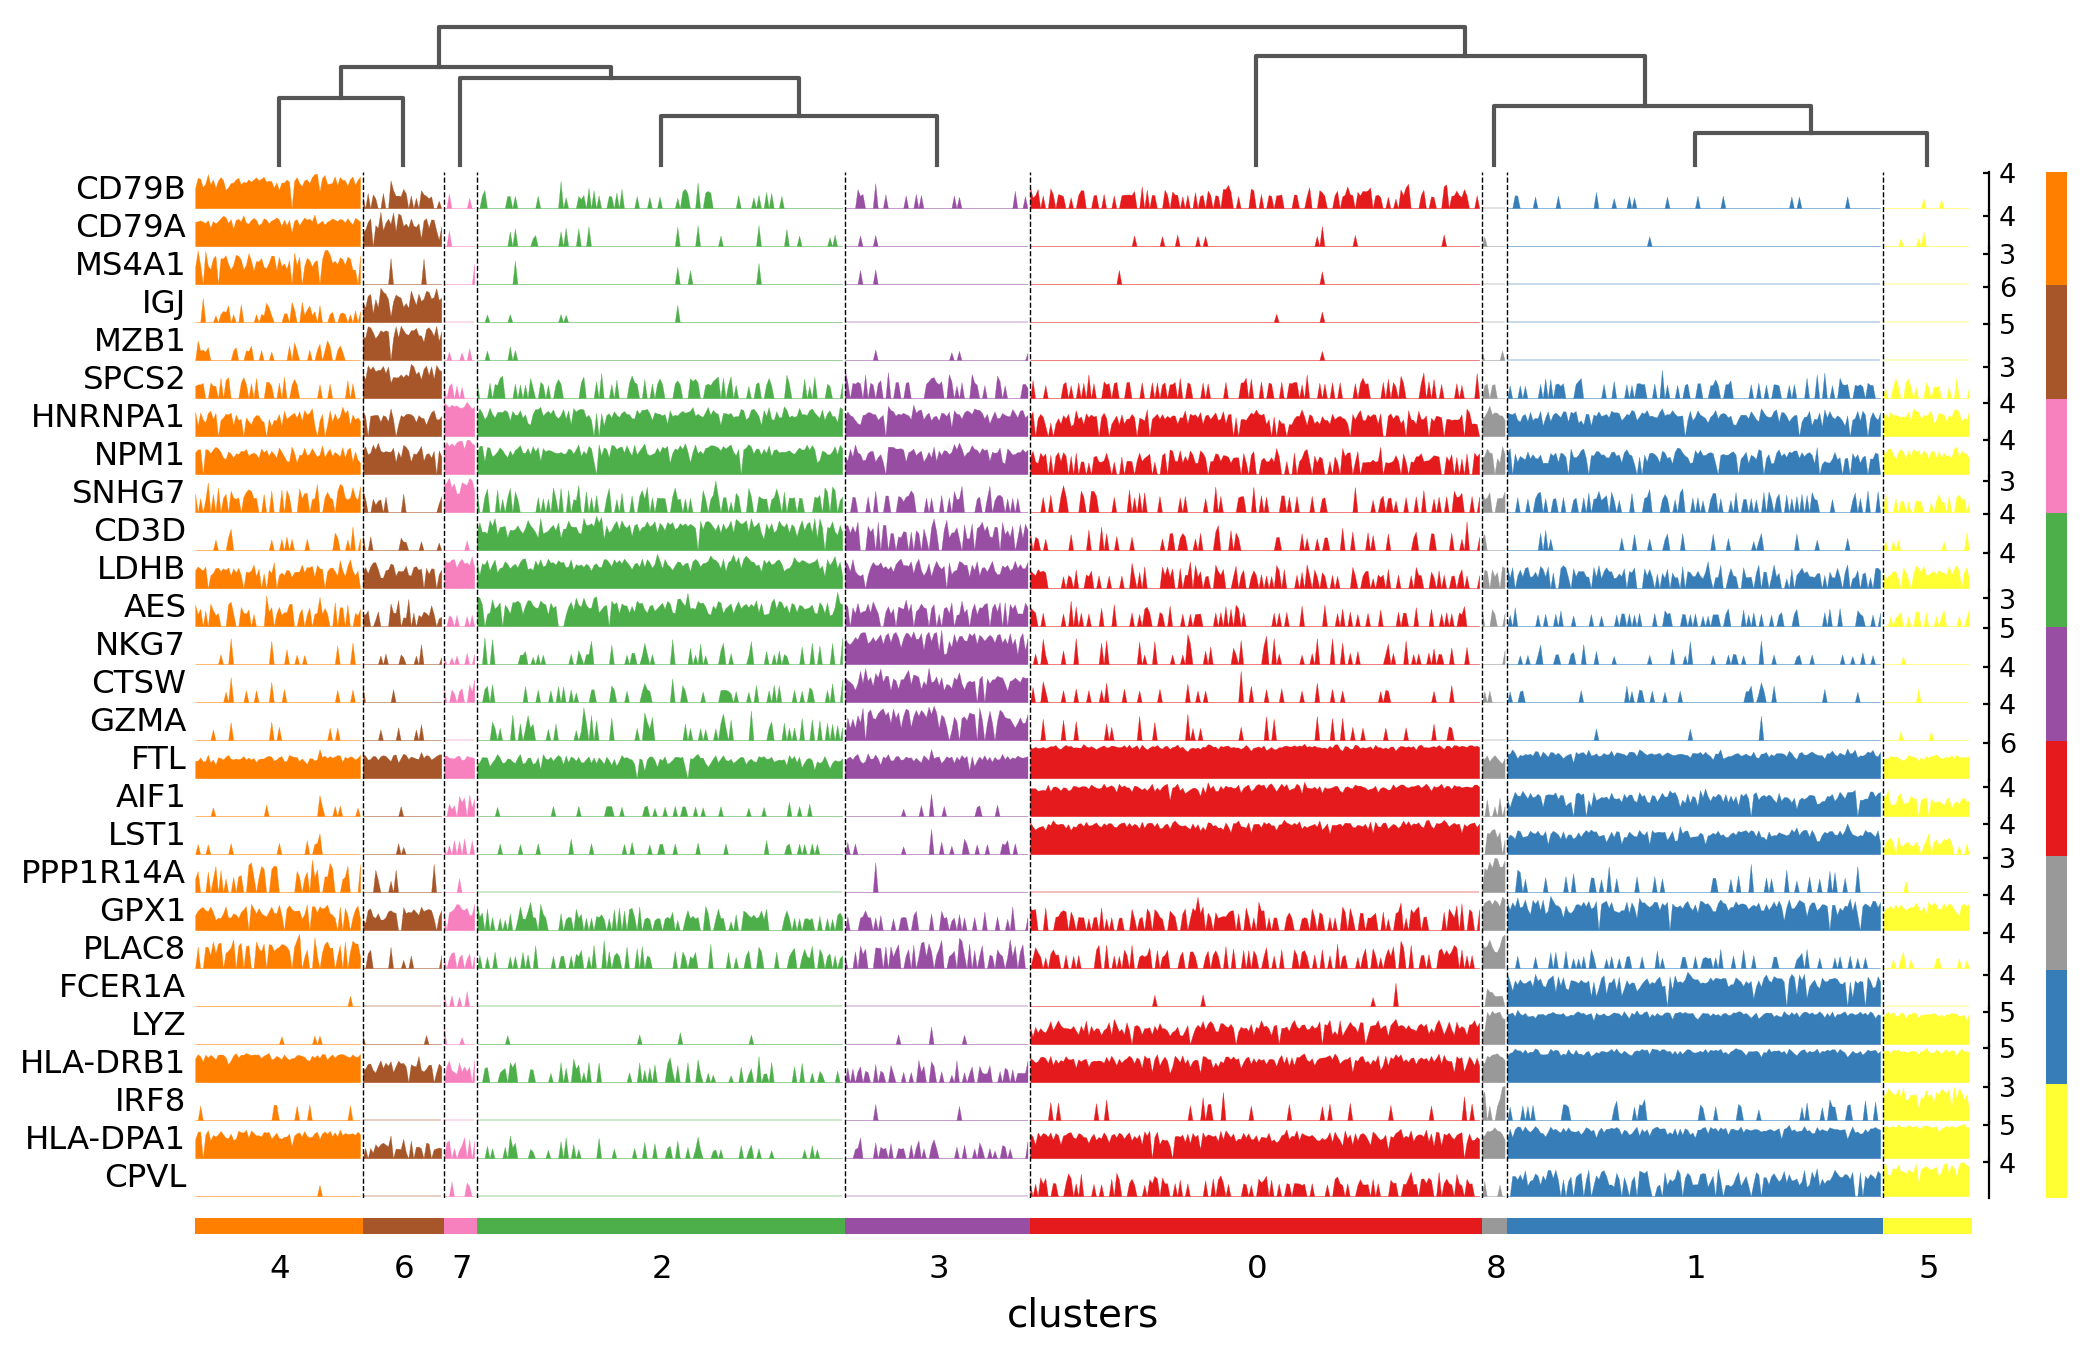

In [38]:
sc.pl.rank_genes_groups_tracksplot(pbmc, n_genes=3)

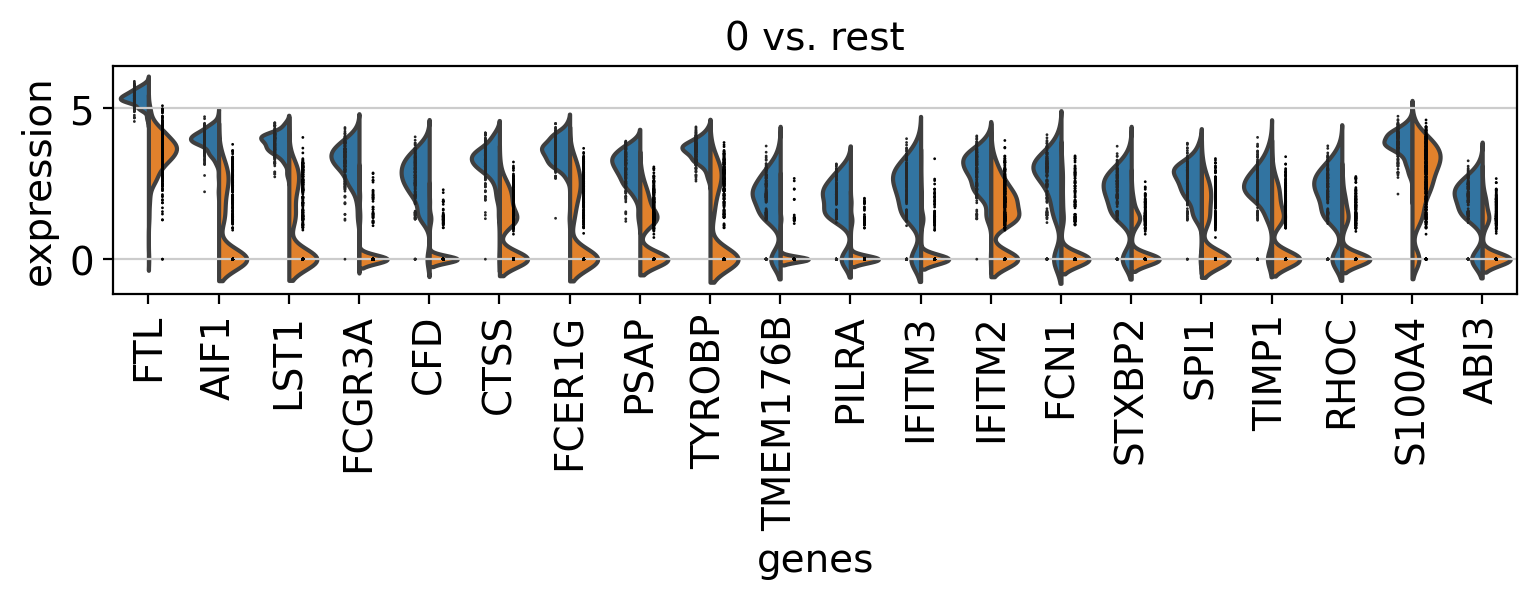

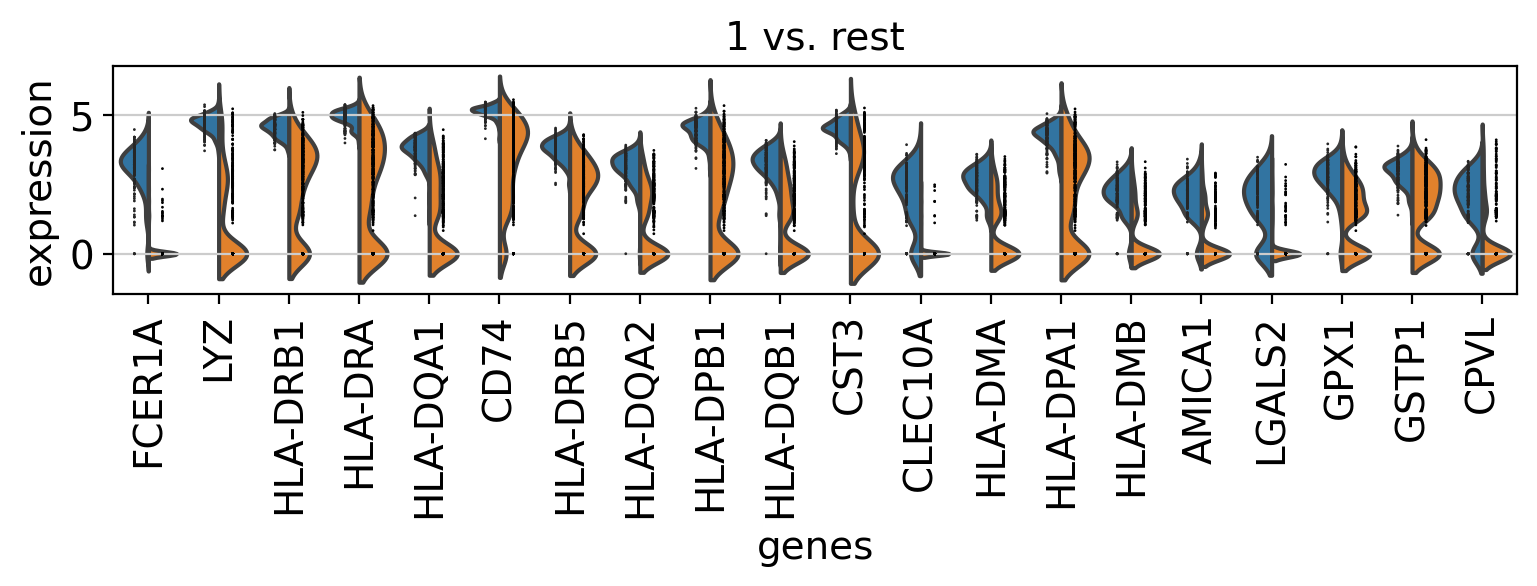

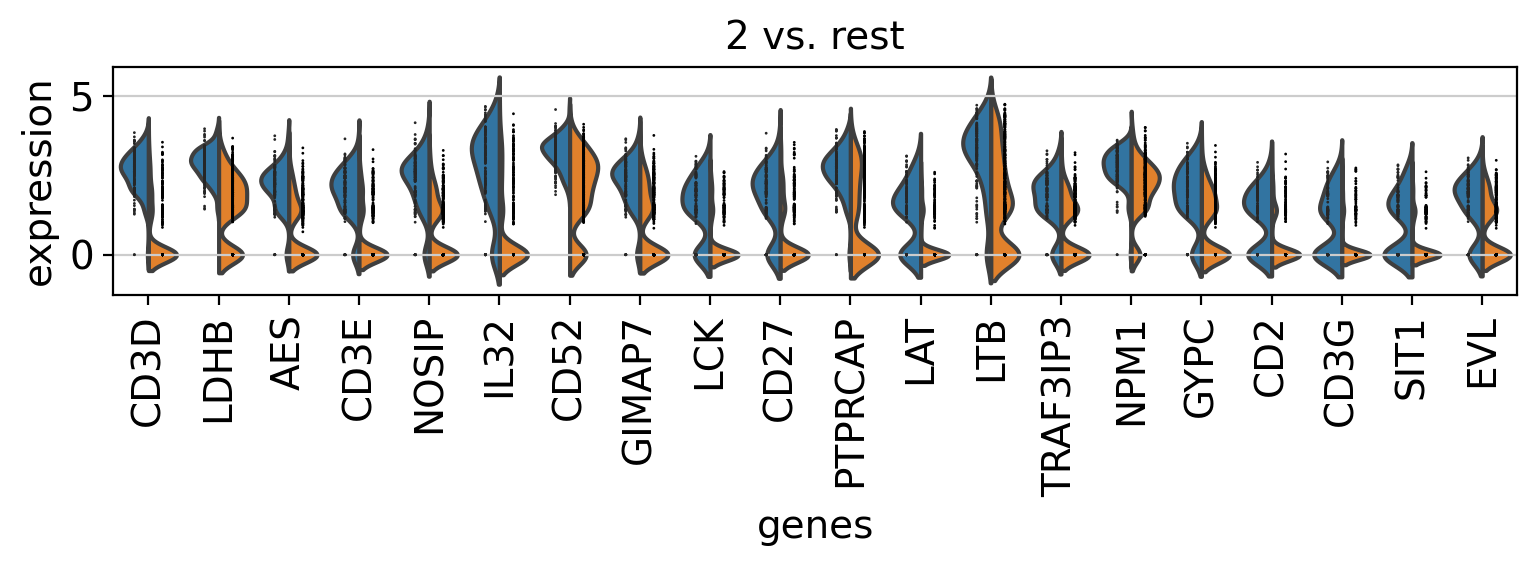

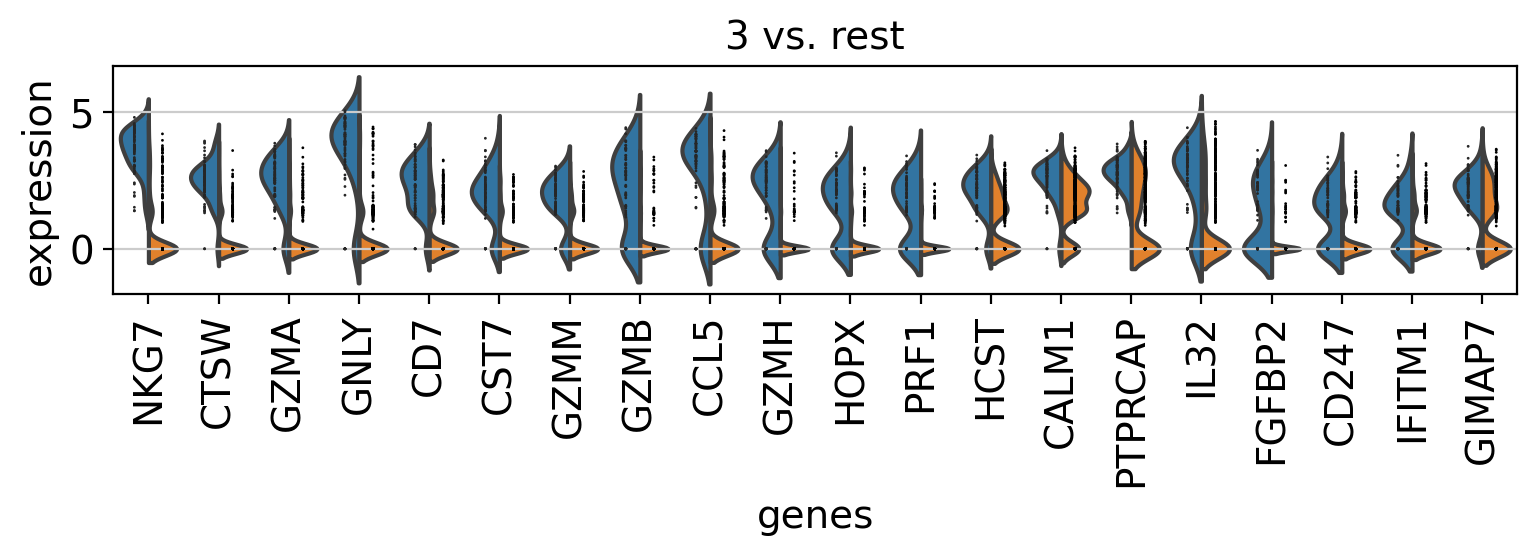

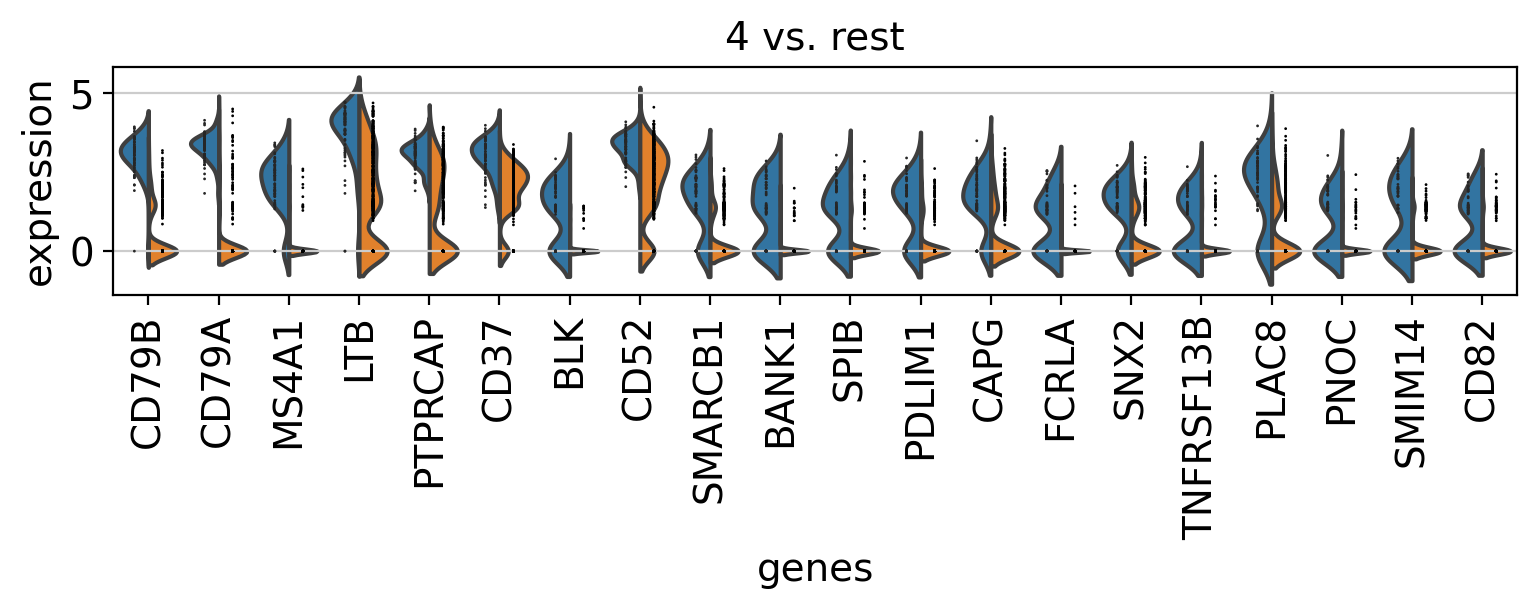

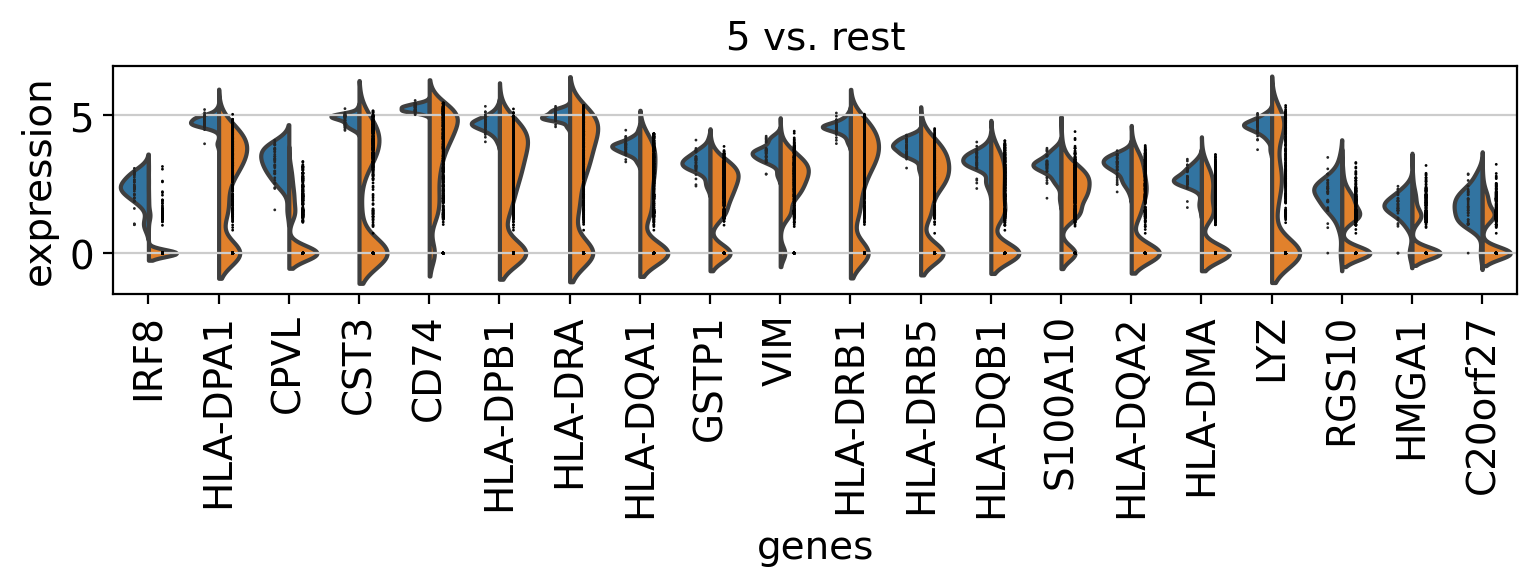

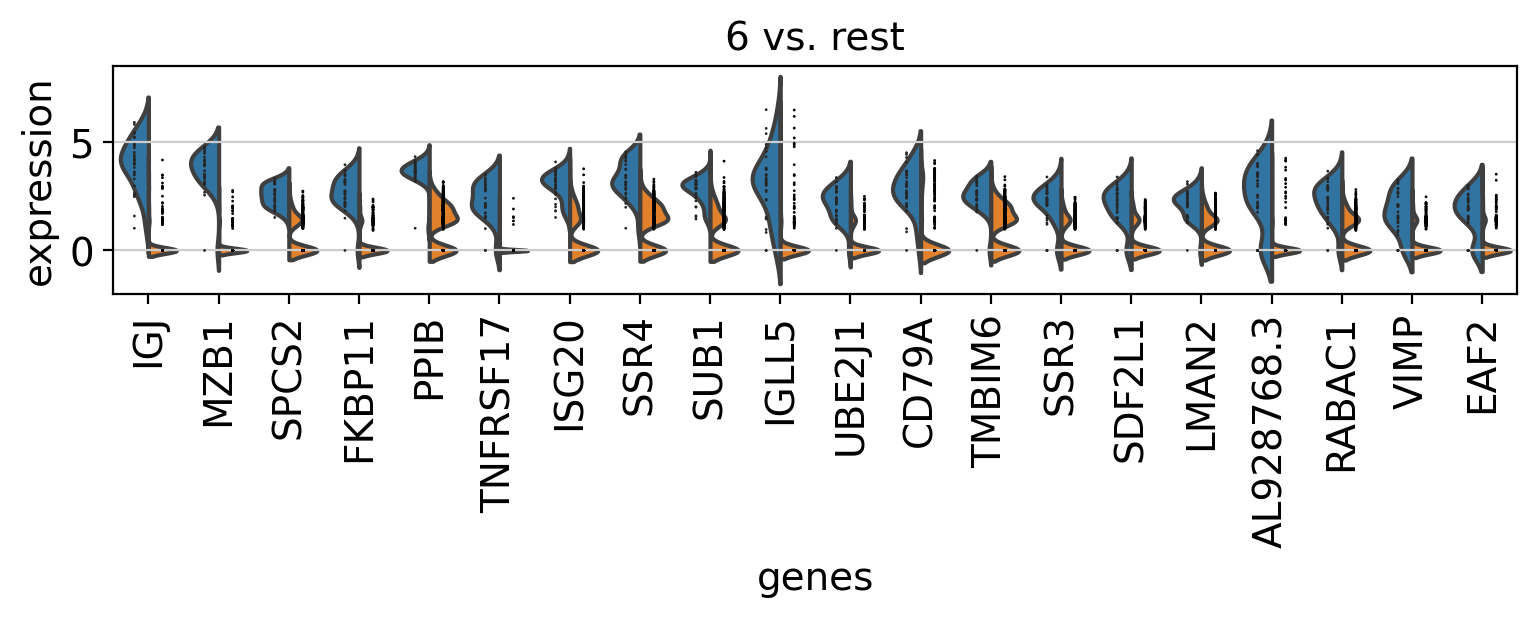

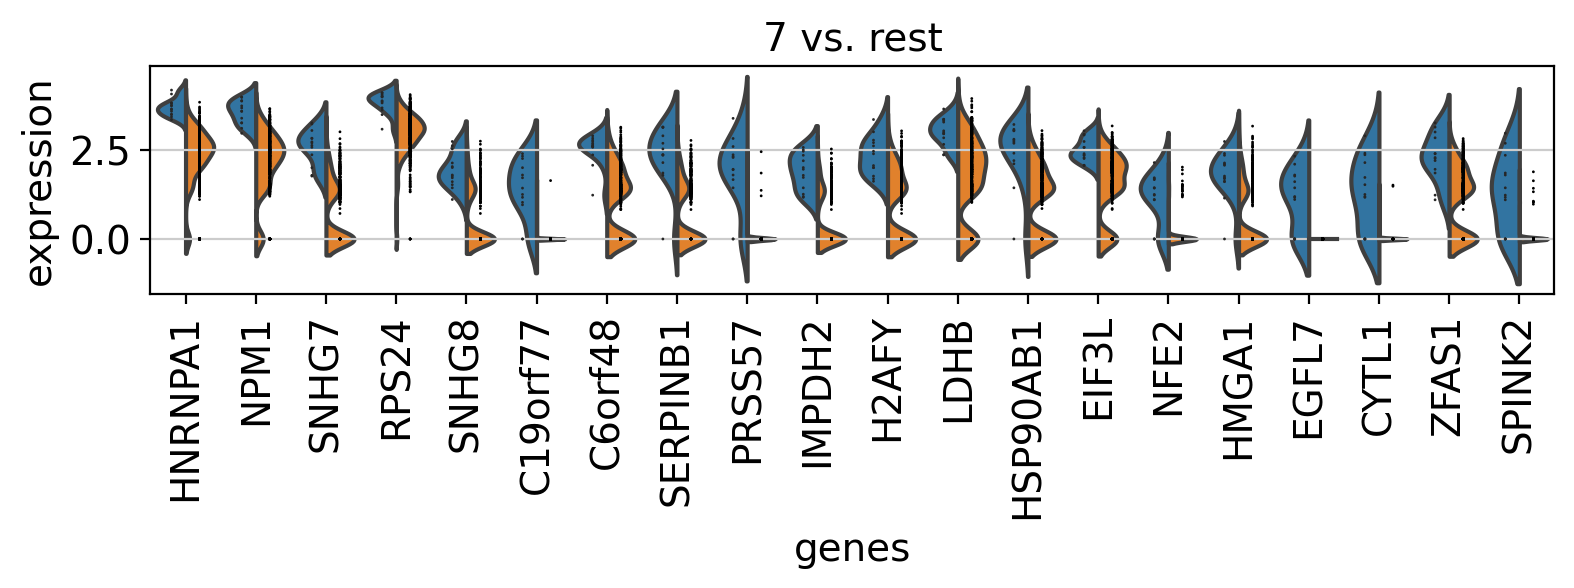

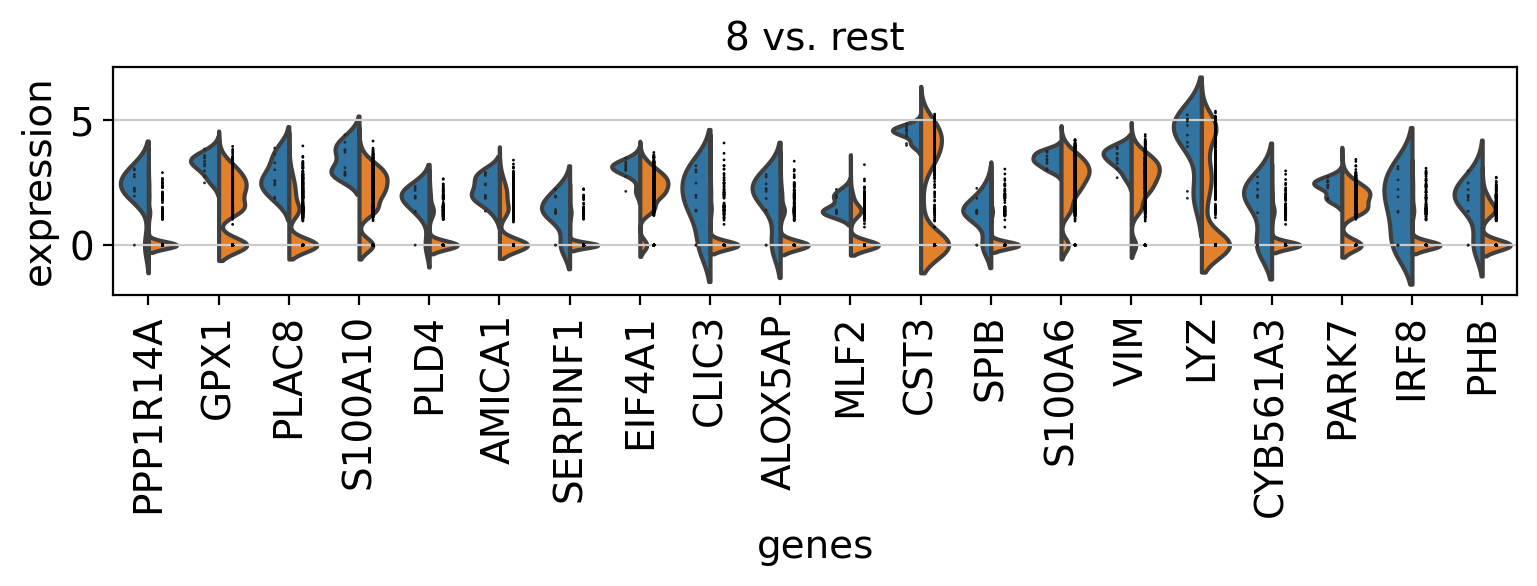

In [39]:
with rc_context({'figure.figsize': (9, 1.5)}):
  sc.pl.rank_genes_groups_violin(pbmc, n_genes=20, jitter=False)

In [40]:
sc.tl.dendrogram(pbmc, 'bulk_labels')

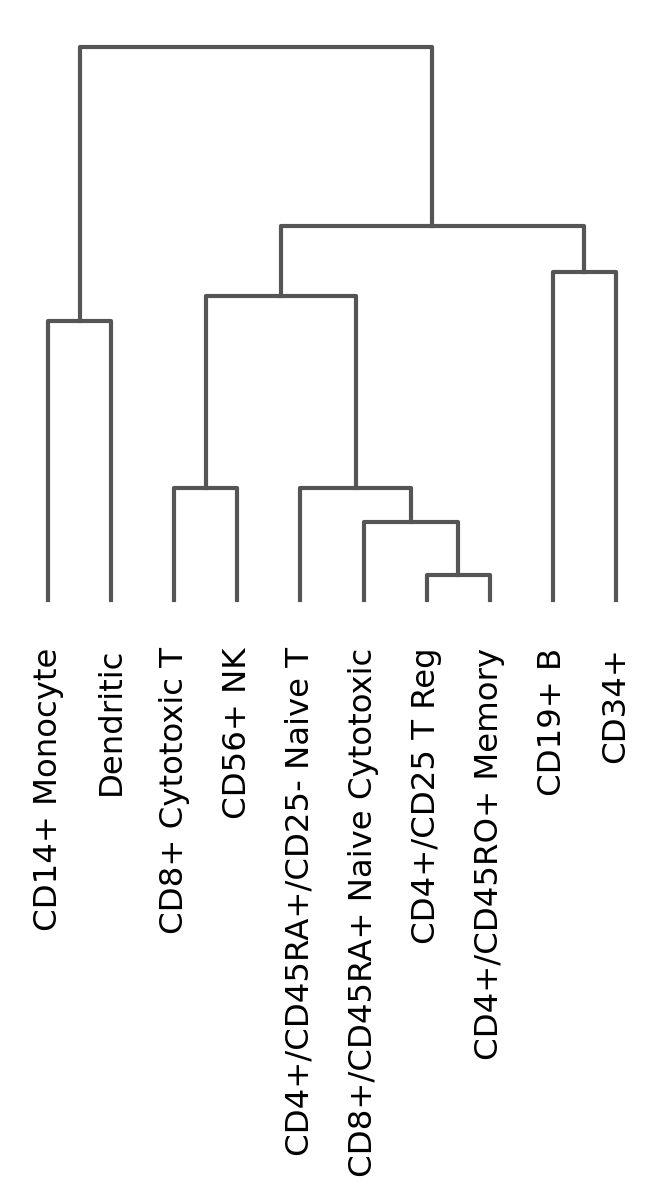

In [41]:
ax = sc.pl.dendrogram(pbmc, 'bulk_labels')

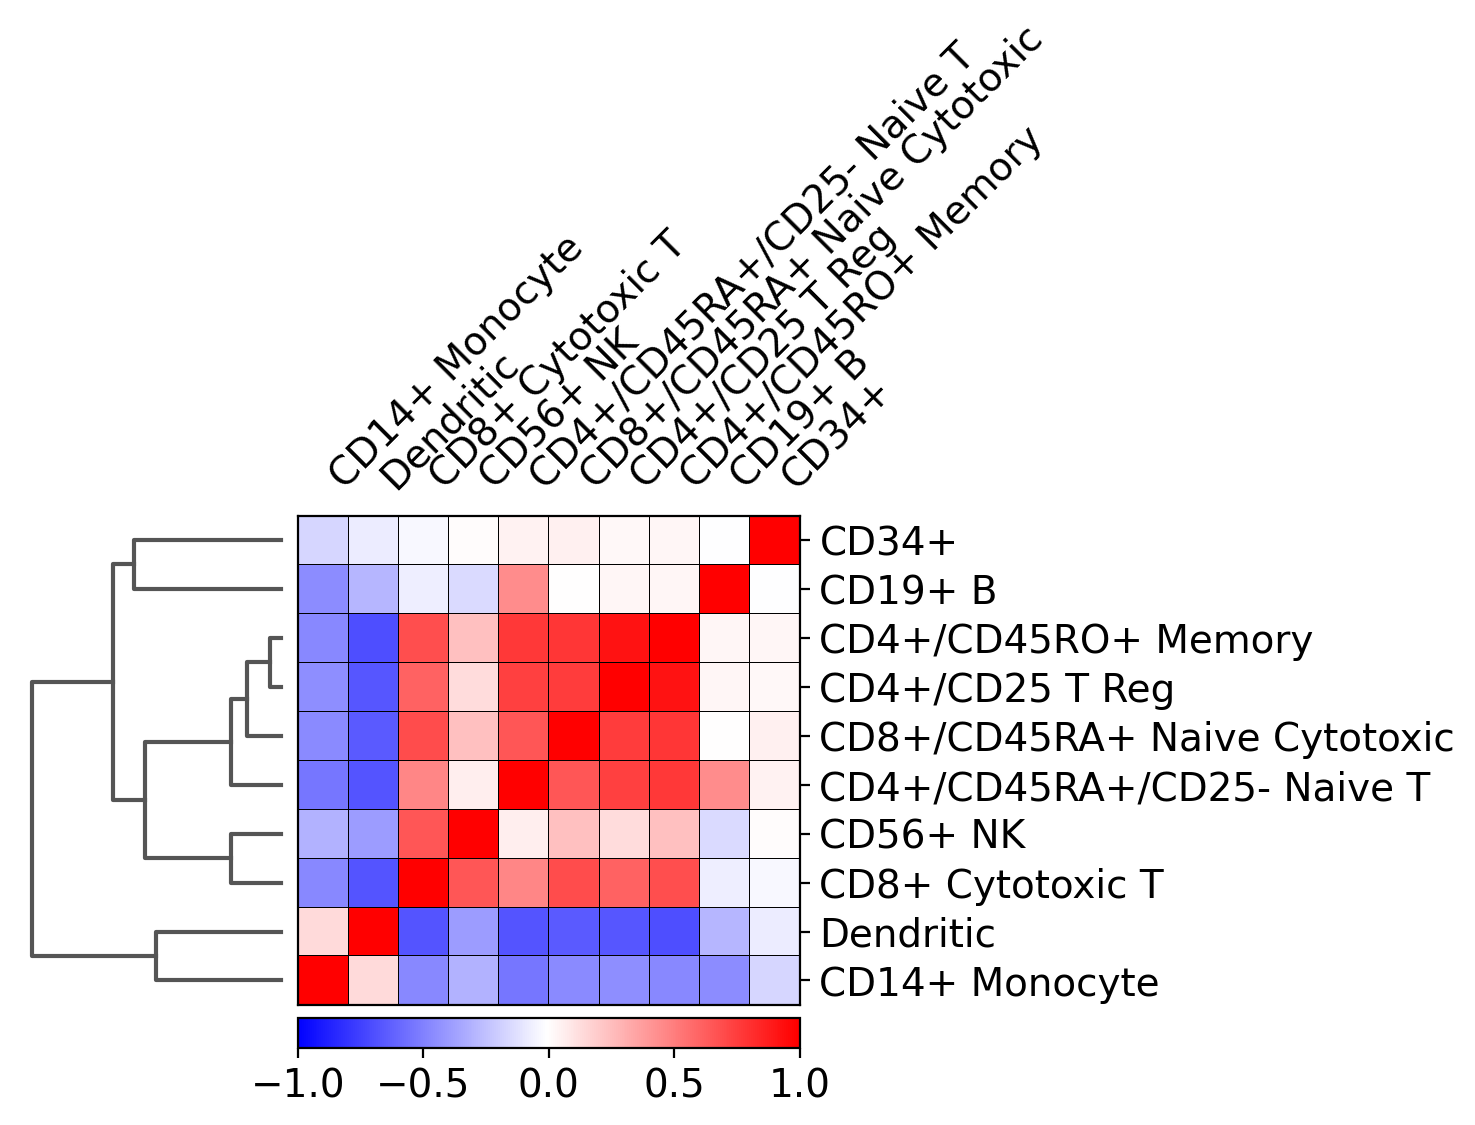

In [42]:
# Plot correlation
ax = sc.pl.correlation_matrix(pbmc, 'bulk_labels', figsize=(5, 3.5))